In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_arrivals = pd.read_csv(f'./data/df_arrivals.csv',sep = ",")
df_departures = pd.read_csv(f'./data/df_departures.csv',sep = ",")

# Compagnies aériennes

## Comparaison des aéroports intra et inter

### Comparaison des vols nationaux et internationaux

In [3]:
Airline_count = len(df_arrivals['Airline Name'])
Airline_nan_count = df_arrivals['Airline Name'].isna().sum()
print(Airline_count)
print(77567 - Airline_nan_count)

77577
33633


In [4]:
df_arrivals.head(5)

,Country,Airport,Flight identification,Flight Status,Aircraft Code,Aircraft Name,Aircraft Registration,Aircraft owner (Country),Airline Name,Airline Code,Departure Country,Departure Airport Name,Departure Airport Code,Scheduled Departure,Scheduled Arrival,Real Departure,Real Arrival,Estimated Departure,Estimated Arrival,Flight Duration
0,Afghanistan,Herat International Airport,RQ101,Scheduled,737,NaN,NaN,NaN,NaN,NaN,Afghanistan,Kabul International Airport,OAKB,2024-03-15 05:00:00,2024-03-15 06:30:00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Herat International Airport,RQ147,Scheduled,737,NaN,NaN,NaN,NaN,NaN,Afghanistan,Mazar-I-Sharif International Airport,OAMS,2024-03-15 07:15:00,2024-03-15 08:30:00,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Herat International Airport,FG251,Scheduled,737,NaN,NaN,NaN,NaN,NaN,Afghanistan,Kabul International Airport,OAKB,2024-03-15 07:30:00,2024-03-15 08:40:00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Herat International Airport,RQ101,Scheduled,737,NaN,SE-MFY,NaN,NaN,NaN,Afghanistan,Kabul International Airport,OAKB,2024-03-16 05:00:00,2024-03-16 06:30:00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Herat International Airport,FG251,Scheduled,737,Boeing 737 MAX 8,NaN,NaN,NaN,NaN,Afghanistan,Kabul International Airport,OAKB,2024-03-16 07:30:00,2024-03-16 08:40:00,NaN,NaN,NaN,NaN,NaN


In [5]:
# Annoter les vols internationaux et nationaux pour df_arrivals
flight_type = []
for row_arr in df_departures.iterrows():
    if row_arr[1]["Country"] == row_arr[1]["Destination Country"]:
        flight_type.append("National")
    elif row_arr[1]["Country"] != row_arr[1]["Destination Country"]:
        flight_type.append("International")

df_departures["Flight Type"] = flight_type

In [6]:
# Annoter les vols internationaux et nationaux pour df_arrivals
flight_type = []
for row_arr in df_arrivals.iterrows():
    if row_arr[1]["Country"] == row_arr[1]["Departure Country"]:
        flight_type.append("National")
    elif row_arr[1]["Country"] != row_arr[1]["Departure Country"]:
        flight_type.append("International")

df_arrivals["Flight Type"] = flight_type

In [7]:
df_arrivals

,Country,Airport,Flight identification,Flight Status,Aircraft Code,Aircraft Name,Aircraft Registration,Aircraft owner (Country),Airline Name,Airline Code,...,Departure Airport Name,Departure Airport Code,Scheduled Departure,Scheduled Arrival,Real Departure,Real Arrival,Estimated Departure,Estimated Arrival,Flight Duration,Flight Type
0,Afghanistan,Herat International Airport,RQ101,Scheduled,737,NaN,NaN,NaN,NaN,NaN,...,Kabul International Airport,OAKB,2024-03-15 05:00:00,2024-03-15 06:30:00,NaN,NaN,NaN,NaN,NaN,National
1,Afghanistan,Herat International Airport,RQ147,Scheduled,737,NaN,NaN,NaN,NaN,NaN,...,Mazar-I-Sharif International Airport,OAMS,2024-03-15 07:15:00,2024-03-15 08:30:00,NaN,NaN,NaN,NaN,NaN,National
2,Afghanistan,Herat International Airport,FG251,Scheduled,737,NaN,NaN,NaN,NaN,NaN,...,Kabul International Airport,OAKB,2024-03-15 07:30:00,2024-03-15 08:40:00,NaN,NaN,NaN,NaN,NaN,National
3,Afghanistan,Herat International Airport,RQ101,Scheduled,737,NaN,SE-MFY,NaN,NaN,NaN,...,Kabul International Airport,OAKB,2024-03-16 05:00:00,2024-03-16 06:30:00,NaN,NaN,NaN,NaN,NaN,National
4,Afghanistan,Herat International Airport,FG251,Scheduled,737,Boeing 737 MAX 8,NaN,NaN,NaN,NaN,...,Kabul International Airport,OAKB,2024-03-16 07:30:00,2024-03-16 08:40:00,NaN,NaN,NaN,NaN,NaN,National
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77572,Zimbabwe,Victoria Falls Airport,4Z494,Scheduled,E90,Mitsubishi CRJ-900LR,HB-IJO,NaN,NaN,NaN,...,Johannesburg OR Tambo International Airport,FAOR,2024-03-16 09:35:00,2024-03-16 11:20:00,NaN,NaN,NaN,NaN,NaN,International
77573,Zimbabwe,Victoria Falls Airport,4Z476,Scheduled,ER3,Boeing 787-8 Dreamliner,NaN,NaN,NaN,NaN,...,Nelspruit Kruger Mpumalanga International Airport,FAKN,2024-03-16 09:35:00,2024-03-16 11:25:00,NaN,NaN,NaN,NaN,NaN,International
77574,Zimbabwe,Victoria Falls Airport,SA40,Scheduled,320,Boeing 767-3Z9(ER),OE-LWG,NaN,NaN,NaN,...,Johannesburg OR Tambo International Airport,FAOR,2024-03-16 09:50:00,2024-03-16 11:25:00,NaN,NaN,NaN,NaN,NaN,International
77575,Zimbabwe,Victoria Falls Airport,5Z764,Scheduled,CR1,Embraer E175STD,NaN,NaN,NaN,NaN,...,Johannesburg OR Tambo International Airport,FAOR,2024-03-16 10:40:00,2024-03-16 12:20:00,NaN,NaN,NaN,NaN,NaN,International


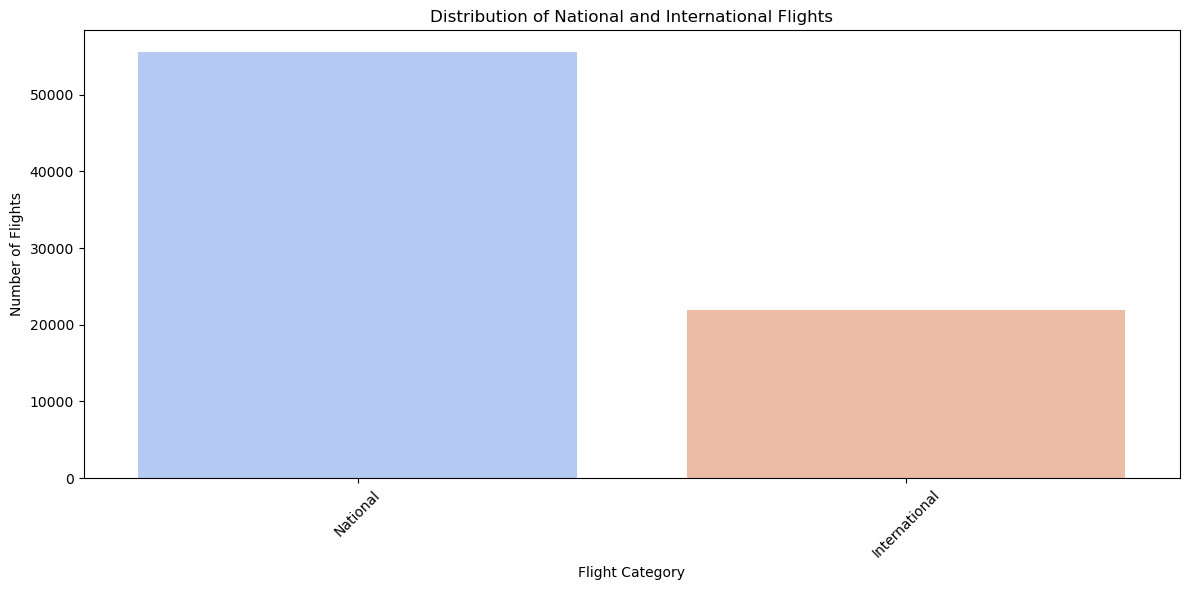

In [8]:
# Créer le graphique avec Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=df_arrivals, x='Flight Type', palette='coolwarm')
plt.xlabel('Flight Category')
plt.ylabel('Number of Flights')
plt.title('Distribution of National and International Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pays et aéroport avec le plus de vols nationaux et celui avec le plus de vols internationaux

In [9]:
#Couple pays et aéroport qui reviennent le plus souvent
# Grouper les données par aéroport et par pays, puis compter les vols nationaux et internationaux
airport_counts = df_arrivals.groupby(['Airport', 'Country', 'Flight Type']).size().reset_index(name='Flight Count')

# Identifier l'aéroport et le pays avec le plus grand nombre de vols internationaux et nationaux
airport_most_international = airport_counts[airport_counts['Flight Type'] == 'International'].max()['Airport']
country_most_international = airport_counts[airport_counts['Flight Type'] == 'International'].max()['Country']
airport_most_national = airport_counts[airport_counts['Flight Type'] == 'National'].max()['Airport']
country_most_national = airport_counts[airport_counts['Flight Type'] == 'National'].max()['Country']

print(f"Airport with most international flights: {airport_most_international},{country_most_international}")
print(f"Airport with most international flights: {airport_most_national},{country_most_national}")

Airport with most international flights: Zhengzhou Xinzheng International Airport,Zimbabwe
Airport with most international flights: Ölgii Airport,Zimbabwe


### Top 5 destination les plus convoitées (qui revient le plus)

In [10]:
df_departures.head(5)

,Country,Airport,Flight identification,Flight Status,Aircraft Code,Aircraft Name,Aircraft Registration,Aircraft owner (Country),Airline Name,Airline Code,...,Destination Airport Name,Destination Airport Code,Scheduled Departure,Scheduled Arrival,Real Departure,Real Arrival,Estimated Departure,Estimated Arrival,Flight Duration,Flight Type
0,Afghanistan,Herat International Airport,RQ102,Scheduled,737,NaN,NaN,NaN,NaN,NaN,...,Kabul International Airport,OAKB,2024-03-15 07:15:00,2024-03-15 08:30:00,NaN,NaN,NaN,NaN,NaN,National
1,Afghanistan,Herat International Airport,RQ148,Scheduled,737,NaN,NaN,NaN,NaN,NaN,...,Mazar-I-Sharif International Airport,OAMS,2024-03-15 09:15:00,2024-03-15 10:30:00,NaN,NaN,NaN,NaN,NaN,National
2,Afghanistan,Herat International Airport,FG252,Scheduled,737,NaN,NaN,NaN,NaN,NaN,...,Kabul International Airport,OAKB,2024-03-15 09:30:00,2024-03-15 10:45:00,NaN,NaN,NaN,NaN,NaN,National
3,Afghanistan,Herat International Airport,RQ102,Scheduled,737,NaN,NaN,NaN,NaN,NaN,...,Kabul International Airport,OAKB,2024-03-16 07:15:00,2024-03-16 08:30:00,NaN,NaN,NaN,NaN,NaN,National
4,Afghanistan,Herat International Airport,FG252,Scheduled,737,NaN,NaN,NaN,NaN,NaN,...,Kabul International Airport,OAKB,2024-03-16 09:30:00,2024-03-16 10:45:00,NaN,NaN,NaN,NaN,NaN,National


In [11]:
# Grouper les données par destination de vol et compter les occurrences
destination_counts = df_departures['Destination Country'].value_counts()

# Sélectionner les cinq premiers
top_5_destination = destination_counts.head(5)
top_5_destination.index.name = None
# Créer un DataFrame vide avec les destinations comme colonnes
top_countries = pd.DataFrame(columns=top_5_destination.index)
print(f"Top 4 destinations {list(top_5_destination.index)}")

# Ensuite, pour chaque destination, trouver le pays d'origine le plus fréquent
for destination_country in top_5_destination.index:
    flights_to_destination = df_departures[df_departures['Destination Country'] == destination_country]
    origin_counts = flights_to_destination['Country'].value_counts().head(4)
    top_countries[destination_country] = origin_counts.index
    print(f"Top 4 common origin country for flights to \"{destination_country}\": {list(origin_counts.index)}")

Top 4 destinations ['United States', 'China', 'India', 'Japan', 'Russia']
Top 4 common origin country for flights to "United States": ['United States', 'Mexico', 'Canada', 'Dominican Republic']
Top 4 common origin country for flights to "China": ['China', 'Japan', 'Macao', 'South Korea']
Top 4 common origin country for flights to "India": ['India', 'United Arab Emirates', 'Sri Lanka', 'Oman']
Top 4 common origin country for flights to "Japan": ['Japan', 'South Korea', 'Taiwan', 'China']
Top 4 common origin country for flights to "Russia": ['Russia', 'Uzbekistan', 'Armenia', 'Tajikistan']


In [12]:
top_countries
#Le premier pays d'origine (d'où proviennent les vols) sont les pays eux mêmes vu qu'il y a également les vols nationaux.

,United States,China,India,Japan,Russia
0,United States,China,India,Japan,Russia
1,Mexico,Japan,United Arab Emirates,South Korea,Uzbekistan
2,Canada,Macao,Sri Lanka,Taiwan,Armenia
3,Dominican Republic,South Korea,Oman,China,Tajikistan


### Pays et aéroport avec le plus de vol

In [13]:
#Ici je recherche le couple pays + aéroport qui revient le plus souvent
# Grouper les données par aéroport et par pays, puis compter le nombre total de vols
airport_counts = df_arrivals.groupby(['Airport', 'Country']).size().reset_index(name='Flight Count')

# Identifier l'aéroport et le pays avec le plus grand nombre total de vols
airport_most_flights = airport_counts.loc[airport_counts['Flight Count'].idxmax()]

print("Airport with most flights:", airport_most_flights['Airport'])
print("Country with most flights:", airport_most_flights['Country'])

Airport with most flights: Abu Dhabi Zayed International Airport
Country with most flights: United Arab Emirates


### Pays avec le plus de vol

In [14]:
#Pays avec le plus de vol à l'international
international_flights = df_arrivals[df_arrivals['Flight Type'] == "International"]
most_flights_country = international_flights['Departure Country'].value_counts().idxmax()
print(f"Le pays avec le plus de vol (Internationaux): {most_flights_country}")

#Destination favorite de ce pays (Vers où il va) 
flights_from_most_flights_country = international_flights[international_flights['Departure Country'] == most_flights_country]["Country"].value_counts()
print(f"Les destinations favorites de {most_flights_country}: {list(flights_from_most_flights_country.head(5).index)}")

Le pays avec le plus de vol (Internationaux): United States
Les destinations favorites de United States: ['Mexico', 'Canada', 'Dominican Republic', 'Bahamas', 'Puerto Rico']


### Destination favorite

In [15]:
# Trouver la destination favorite en général
international_flights = df_departures[df_departures['Flight Type'] == "International"]
most_popular_destination = international_flights['Destination Country'].value_counts().idxmax()
print(f"La destionation favorite: {most_popular_destination}")

#Qui vient visiter
flights_to_most_popular_destination = international_flights[international_flights['Destination Country'] == most_popular_destination]["Country"].value_counts()
print(f"Les pays qui viennent le plus visiter {most_popular_destination}: {list(flights_from_most_flights_country.head(5).index)}")

La destionation favorite: United States
Les pays qui viennent le plus visiter United States: ['Mexico', 'Canada', 'Dominican Republic', 'Bahamas', 'Puerto Rico']


# Analyse des retards

In [16]:
df_flights = pd.read_csv(f'./data/data_usa/flights.csv', low_memory=False)

In [17]:
print(df_flights.shape)

(5819079, 31)


Vu la taille du dataset (contient tous les vols de l'année 2015), on ne considère qu'une partie en se limitant au mois d'avril

In [18]:
df_flights_april = df_flights[df_flights['MONTH'] == 4]

In [19]:
df_flights_april

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1403471,2015,4,1,3,AS,108,N760AS,ANC,SEA,5,...,422.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1403472,2015,4,1,3,US,448,N155UW,SLC,CLT,15,...,551.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1403473,2015,4,1,3,US,794,N563UW,LAX,PHL,15,...,756.0,-29.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1403474,2015,4,1,3,AA,1230,N3JJAA,SEA,DFW,15,...,604.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1403475,2015,4,1,3,DL,806,N584NW,SFO,MSP,15,...,527.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888617,2015,4,30,4,B6,839,N793JB,JFK,BQN,2359,...,344.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1888618,2015,4,30,4,B6,745,N766JB,JFK,PSE,2359,...,339.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1888619,2015,4,30,4,B6,1503,N663JB,JFK,SJU,2359,...,351.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1888620,2015,4,30,4,B6,98,N521JB,DEN,JFK,2359,...,601.0,27.0,0,0,NaN,12.0,0.0,15.0,0.0,0.0


## Pre-processing

### Dates
Dans le dataset, on a 4 colonnes qui font référence à la date, [YEAR,MONTH,DAY,DAY_OF_WEEK], on va utiliser le format datatime pour n'avoir qu'une seule colonne

In [20]:
df_flights_april.insert(loc = 0, column = 'DATE',value = pd.to_datetime(df_flights_april.loc[:, ['YEAR','MONTH', 'DAY']]))

In [21]:
df_flights_april

,DATE,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1403471,2015-04-01,2015,4,1,3,AS,108,N760AS,ANC,SEA,...,422.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1403472,2015-04-01,2015,4,1,3,US,448,N155UW,SLC,CLT,...,551.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1403473,2015-04-01,2015,4,1,3,US,794,N563UW,LAX,PHL,...,756.0,-29.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1403474,2015-04-01,2015,4,1,3,AA,1230,N3JJAA,SEA,DFW,...,604.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1403475,2015-04-01,2015,4,1,3,DL,806,N584NW,SFO,MSP,...,527.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888617,2015-04-30,2015,4,30,4,B6,839,N793JB,JFK,BQN,...,344.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1888618,2015-04-30,2015,4,30,4,B6,745,N766JB,JFK,PSE,...,339.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1888619,2015-04-30,2015,4,30,4,B6,1503,N663JB,JFK,SJU,...,351.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1888620,2015-04-30,2015,4,30,4,B6,98,N521JB,DEN,JFK,...,601.0,27.0,0,0,NaN,12.0,0.0,15.0,0.0,0.0


### Heures
Les heures de SCHEDULED_DEPARTURES par exemple sont mal formatées, c'est un int dont les deux premiers chiffres définissent les heures et les deux derniers les minutes.

In [22]:
import datetime
import numpy as np
#Fonction qui convertit ce format en un format datetime.time
def convert_time(chaine):
    float(chaine.iloc[0])
    if pd.isna(chaine.iloc[0]):
        return np.nan
    else:
        if chaine.iloc[0] == 2400: 
            chaine.iloc[0] = 0
        chaine = "{0:04d}".format(int(chaine.iloc[0]))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure

def format_col(df,col):
    liste = []
    for index,value in df[[col]].iterrows():
        liste.append(convert_time(value))
    return liste

In [23]:
#Convertir les heures au bon format
df_flights_april.loc[:,'SCHEDULED_DEPARTURE']= format_col(df_flights_april, 'SCHEDULED_DEPARTURE')
df_flights_april.loc[:,'DEPARTURE_TIME'] = format_col(df_flights_april, 'DEPARTURE_TIME')
df_flights_april.loc[:,'SCHEDULED_ARRIVAL'] = format_col(df_flights_april, 'SCHEDULED_ARRIVAL')
df_flights_april.loc[:,'ARRIVAL_TIME'] = format_col(df_flights_april, 'ARRIVAL_TIME')

In [24]:
df_flights_april[["DATE","SCHEDULED_DEPARTURE","SCHEDULED_ARRIVAL","DEPARTURE_TIME","ARRIVAL_TIME"]]

,DATE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME
1403471,2015-04-01,00:05:00,04:26:00,00:06:00,04:22:00
1403472,2015-04-01,00:15:00,06:07:00,00:10:00,05:51:00
1403473,2015-04-01,00:15:00,08:25:00,00:05:00,07:56:00
1403474,2015-04-01,00:15:00,06:10:00,00:12:00,06:04:00
1403475,2015-04-01,00:15:00,05:47:00,00:12:00,05:27:00
...,...,...,...,...,...
1888617,2015-04-30,23:59:00,03:39:00,23:56:00,03:44:00
1888618,2015-04-30,23:59:00,03:48:00,23:53:00,03:39:00
1888619,2015-04-30,23:59:00,03:40:00,23:58:00,03:51:00
1888620,2015-04-30,23:59:00,05:34:00,00:14:00,06:01:00


In [25]:
df_april = df_flights_april.copy(deep=True)

### Suppression des colonnes non utilisées

In [26]:
df_april.columns

Index(['DATE', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [27]:
non_used_columns = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK','FLIGHT_NUMBER', 'TAIL_NUMBER','TAXI_OUT',
       'WHEELS_OFF','WHEELS_ON', 'TAXI_IN','AIR_TIME','DIVERTED', 'CANCELLED', 'CANCELLATION_REASON','AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df_april = df_flights_april.drop(non_used_columns,axis=1)
df_april

,DATE,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
1403471,2015-04-01,AS,ANC,SEA,00:05:00,00:06:00,1.0,201.0,196.0,1448,04:26:00,04:22:00,-4.0
1403472,2015-04-01,US,SLC,CLT,00:15:00,00:10:00,-5.0,232.0,221.0,1727,06:07:00,05:51:00,-16.0
1403473,2015-04-01,US,LAX,PHL,00:15:00,00:05:00,-10.0,310.0,291.0,2402,08:25:00,07:56:00,-29.0
1403474,2015-04-01,AA,SEA,DFW,00:15:00,00:12:00,-3.0,235.0,232.0,1660,06:10:00,06:04:00,-6.0
1403475,2015-04-01,DL,SFO,MSP,00:15:00,00:12:00,-3.0,212.0,195.0,1589,05:47:00,05:27:00,-20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888617,2015-04-30,B6,JFK,BQN,23:59:00,23:56:00,-3.0,220.0,228.0,1576,03:39:00,03:44:00,5.0
1888618,2015-04-30,B6,JFK,PSE,23:59:00,23:53:00,-6.0,229.0,226.0,1617,03:48:00,03:39:00,-9.0
1888619,2015-04-30,B6,JFK,SJU,23:59:00,23:58:00,-1.0,221.0,233.0,1598,03:40:00,03:51:00,11.0
1888620,2015-04-30,B6,DEN,JFK,23:59:00,00:14:00,15.0,215.0,227.0,1626,05:34:00,06:01:00,27.0


In [28]:
#Convertir les distances de miles à kilomètres
import math
def miles_to_kilometers(miles):
    return math.ceil(float(miles.iloc[0]) * 1.60934)

def convert_distances(df,col):
    liste = []
    for index,value in df[[col]].iterrows():
        liste.append(miles_to_kilometers(value))
    return liste

In [29]:
df_april.loc[:,'DISTANCE']= convert_distances(df_april, 'DISTANCE')

In [30]:
df_april

,DATE,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
1403471,2015-04-01,AS,ANC,SEA,00:05:00,00:06:00,1.0,201.0,196.0,2331,04:26:00,04:22:00,-4.0
1403472,2015-04-01,US,SLC,CLT,00:15:00,00:10:00,-5.0,232.0,221.0,2780,06:07:00,05:51:00,-16.0
1403473,2015-04-01,US,LAX,PHL,00:15:00,00:05:00,-10.0,310.0,291.0,3866,08:25:00,07:56:00,-29.0
1403474,2015-04-01,AA,SEA,DFW,00:15:00,00:12:00,-3.0,235.0,232.0,2672,06:10:00,06:04:00,-6.0
1403475,2015-04-01,DL,SFO,MSP,00:15:00,00:12:00,-3.0,212.0,195.0,2558,05:47:00,05:27:00,-20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888617,2015-04-30,B6,JFK,BQN,23:59:00,23:56:00,-3.0,220.0,228.0,2537,03:39:00,03:44:00,5.0
1888618,2015-04-30,B6,JFK,PSE,23:59:00,23:53:00,-6.0,229.0,226.0,2603,03:48:00,03:39:00,-9.0
1888619,2015-04-30,B6,JFK,SJU,23:59:00,23:58:00,-1.0,221.0,233.0,2572,03:40:00,03:51:00,11.0
1888620,2015-04-30,B6,DEN,JFK,23:59:00,00:14:00,15.0,215.0,227.0,2617,05:34:00,06:01:00,27.0


## Analyse

### Valeurs manquantes

In [31]:
missing_df = df_april.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Colonne', 'NaN Values']
missing_df['Filling factor (%)']=(df_april.shape[0]-missing_df['NaN Values'])/df_april.shape[0]*100
missing_df.sort_values('Filling factor (%)').reset_index(drop = True)

,Colonne,NaN Values,Filling factor (%)
0,ELAPSED_TIME,5900,98.783884
1,ARRIVAL_DELAY,5900,98.783884
2,ARRIVAL_TIME,4708,99.029580
3,DEPARTURE_TIME,4253,99.123366
4,DEPARTURE_DELAY,4253,99.123366
5,SCHEDULED_TIME,2,99.999588
6,DATE,0,100.000000
7,AIRLINE,0,100.000000
8,ORIGIN_AIRPORT,0,100.000000
9,DESTINATION_AIRPORT,0,100.000000


On voit bien que la majorité des colonnes sont pleines et celles qui sont vides ont un filling factor très élevée (le dataset est bien rempli).

In [32]:
df_april.describe()

,DATE,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,ARRIVAL_DELAY
count,485151,480898.000000,485149.000000,479251.000000,485151.000000,479251.000000
mean,2015-04-15 12:16:33.468837376,7.721885,141.061216,136.778517,1315.335897,3.163190
min,2015-04-01 00:00:00,-68.000000,20.000000,15.000000,34.000000,-87.000000
25%,2015-04-08 00:00:00,-5.000000,85.000000,82.000000,601.000000,-13.000000
50%,2015-04-15 00:00:00,-2.000000,122.000000,118.000000,1042.000000,-5.000000
75%,2015-04-23 00:00:00,6.000000,173.000000,168.000000,1698.000000,7.000000
max,2015-04-30 00:00:00,1542.000000,679.000000,735.000000,8020.000000,1554.000000
std,NaN,34.507157,74.458034,73.708221,963.239691,36.587458


On se concentre sur les colonnes DEPARTURE_DELAY et ARRIVAL_DELAY, la moyenne dans tous le dataset est respectivement de: 7.721885 et 3.163190 min.
Pourtant 50% des vols décollent avant l'heure prévue d'environ 2 min et arrivent avant l'heure prévue de 5 min. 

Mais à 75%, on note un retard d'environ 6 et 7 min au décollage et à l'arrivée.

Le plus grand retard enregistrée est d'environ 24,9 heures au décollage et de 25,9 heures à l'arrivée.

### Airlines

#### Departure Delay par compagnies aériennes

In [33]:
def get_stats(group):
    return {'count': group.count(),'min': group.min(), 'max': group.max(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
delay_per_airline_stats = df_april['DEPARTURE_DELAY'].groupby(df_april['AIRLINE']).apply(get_stats).unstack()
delay_per_airline_stats = delay_per_airline_stats.sort_values('count')
delay_per_airline_stats

,count,min,max,mean
AIRLINE,,,,
VX,4901.0,-21.0,533.0,5.653336
HA,6082.0,-25.0,865.0,-2.216376
F9,7113.0,-26.0,602.0,11.723183
NK,9435.0,-24.0,836.0,9.929518
AS,13910.0,-37.0,812.0,0.004242
B6,21885.0,-25.0,500.0,8.327439
MQ,24886.0,-30.0,973.0,8.895925
US,32316.0,-25.0,522.0,4.508355
UA,41020.0,-24.0,1314.0,12.981619


La compagnie aérienne qui fait le plus de retard environ 12 min au décollage est la compagnie aérienne UA: United Air Lines Inc.

Celle qui fait le moins de retard avec une moyenne d'environ -2 min est HA: Hawaiian Airlines Inc.

Le pire retard enregistré (25.7) a été effectué par la compagnie AA : American Airlines Inc.

La meilleure avance enregistré (68 min) a été effectué par la compagnie AA aussi (American Airlines Inc.)

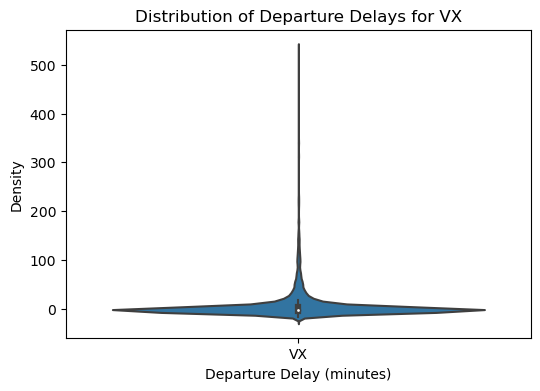

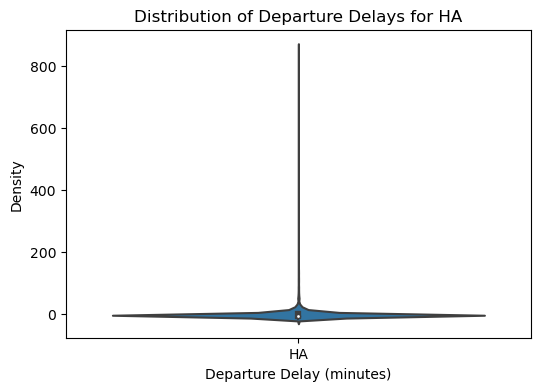

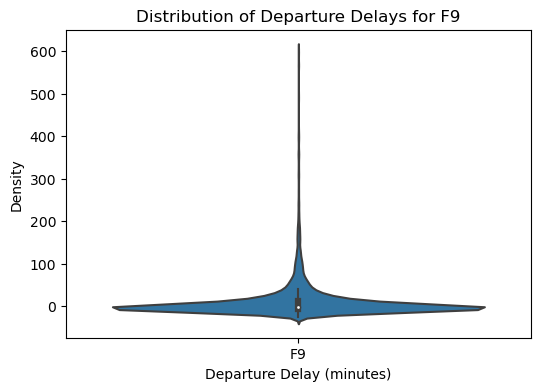

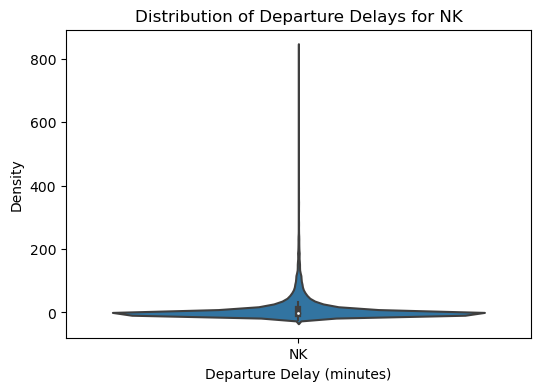

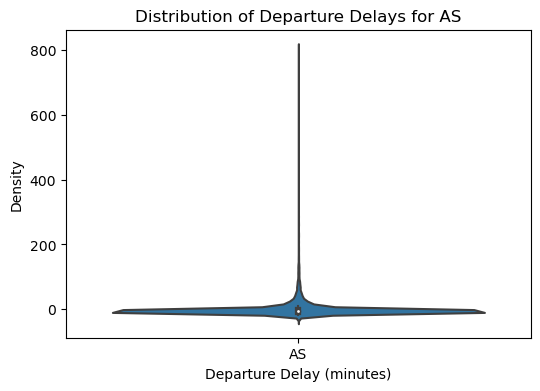

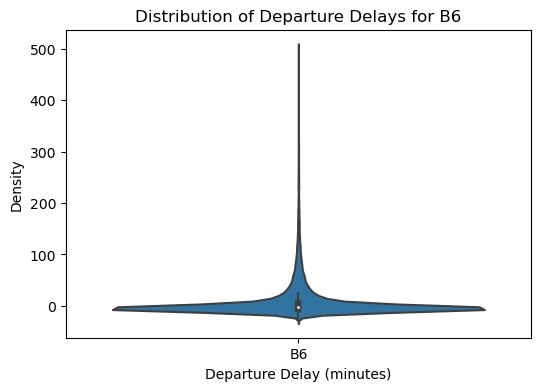

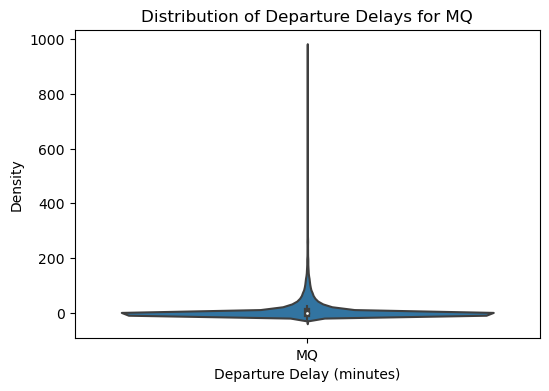

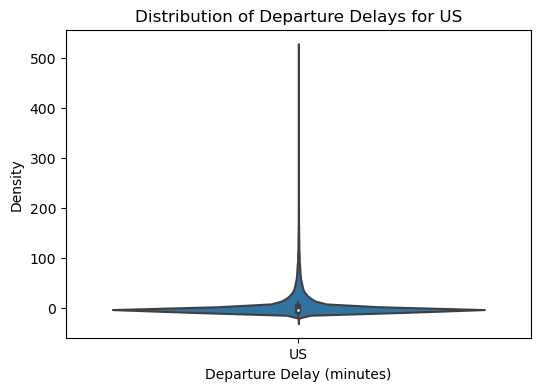

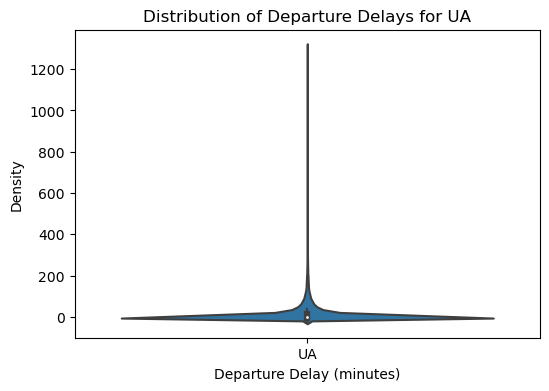

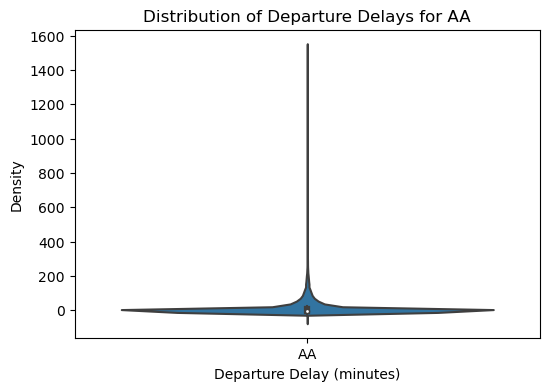

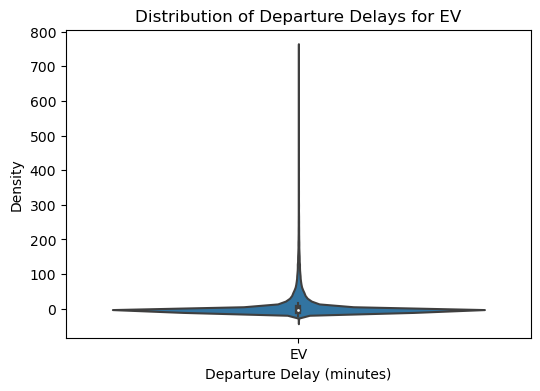

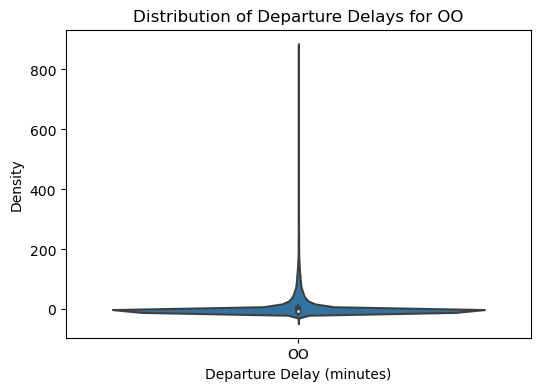

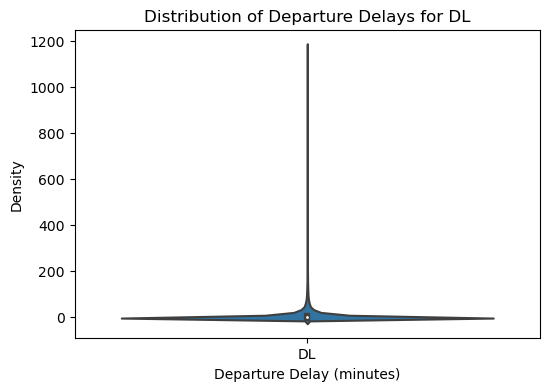

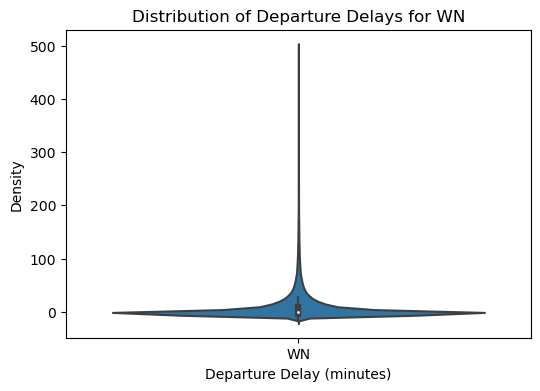

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each airline
for airline in delay_per_airline_stats.index:
    # Filter data for the current airline
    data = df_april[df_april['AIRLINE'] == airline]
    
    # Create a violin plot for the current airline
    plt.figure(figsize=(6, 4))
    sns.violinplot(x = "AIRLINE",y="DEPARTURE_DELAY",data=data)

    # Add title and labels
    plt.title(f'Distribution of Departure Delays for {airline}')
    plt.xlabel('Departure Delay (minutes)')
    plt.ylabel('Density')
    
    # Show the plot
    plt.show()

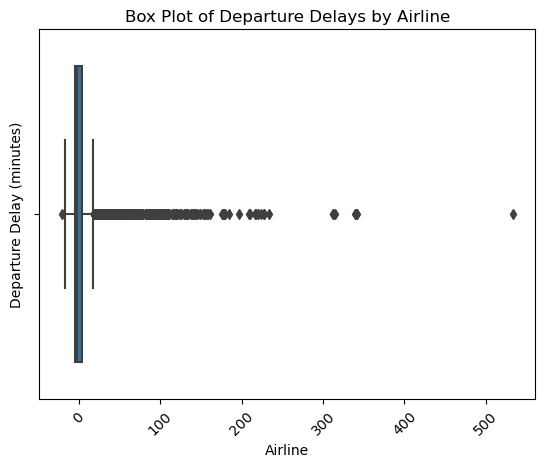

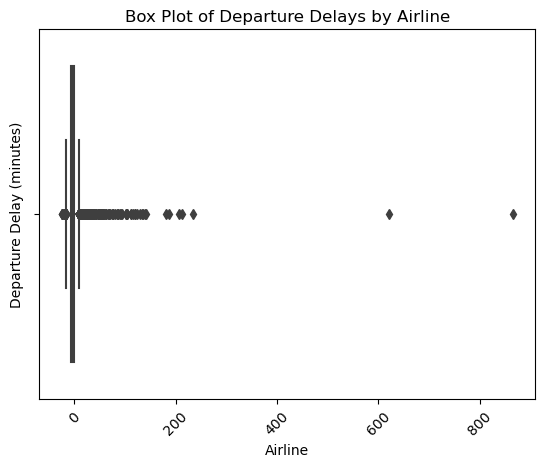

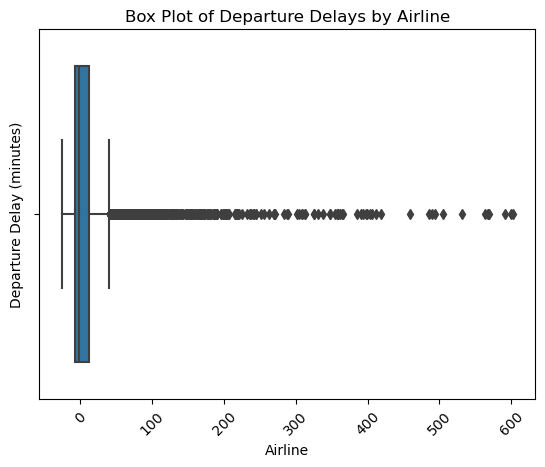

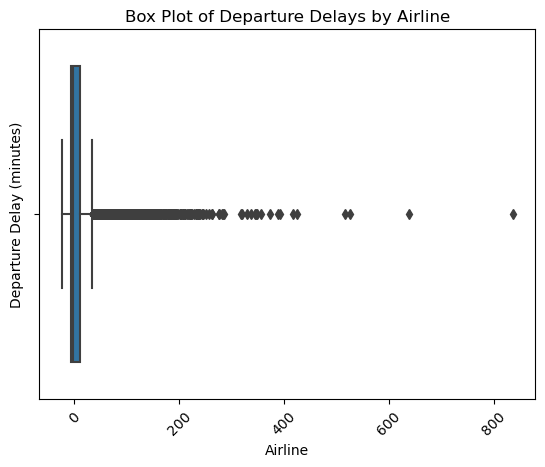

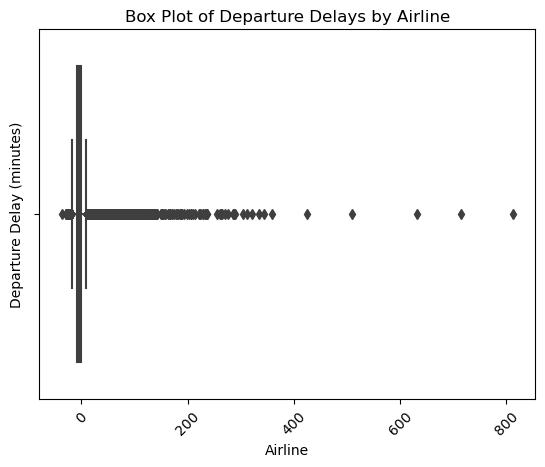

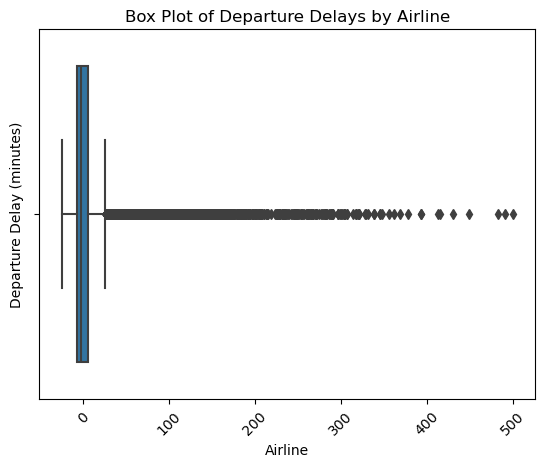

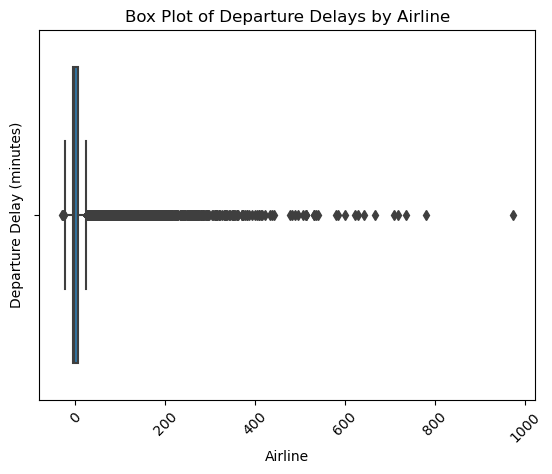

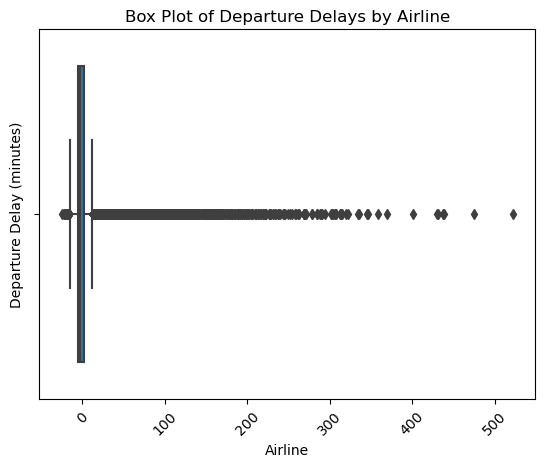

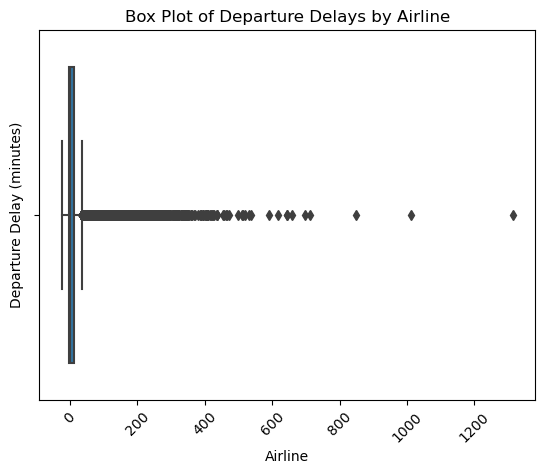

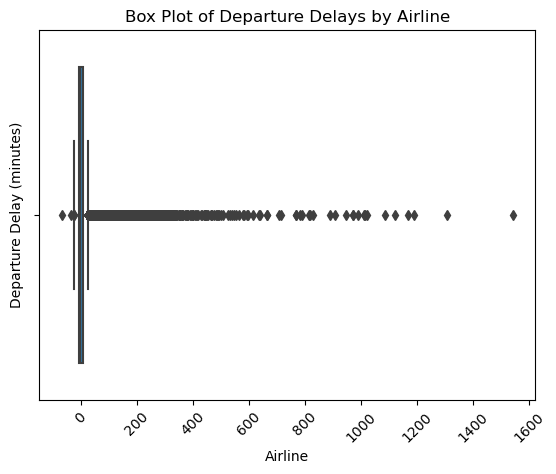

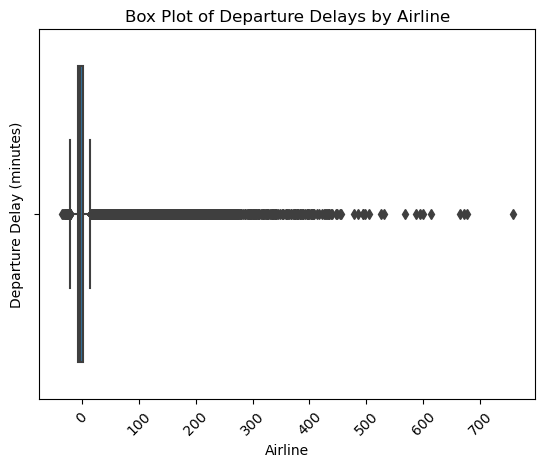

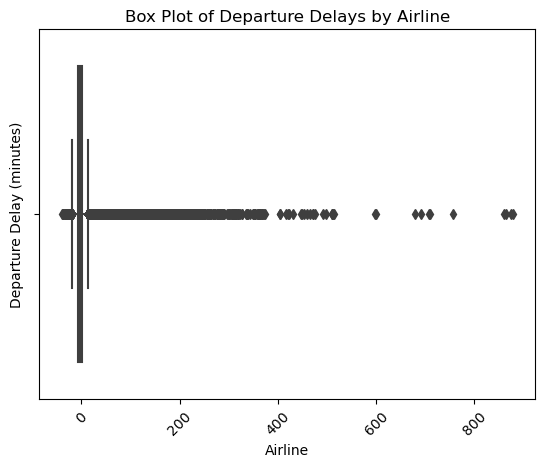

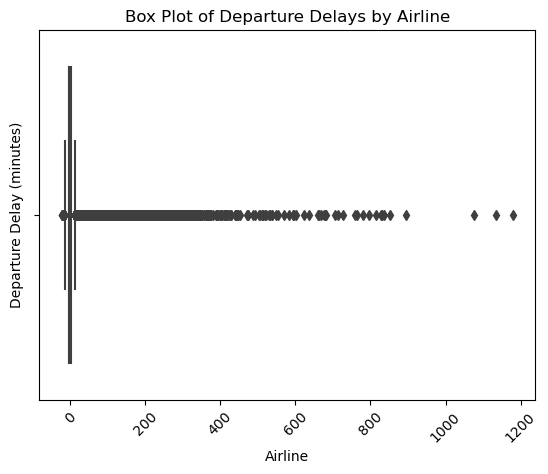

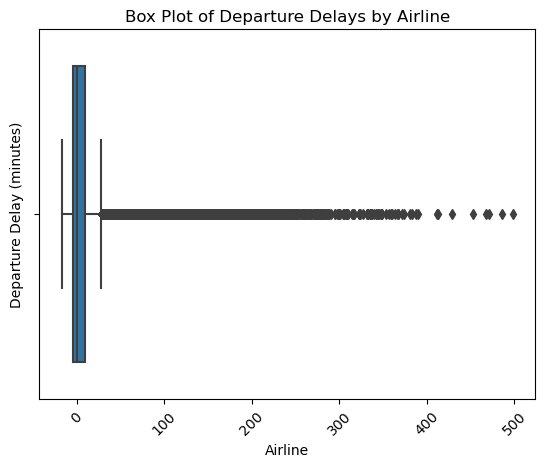

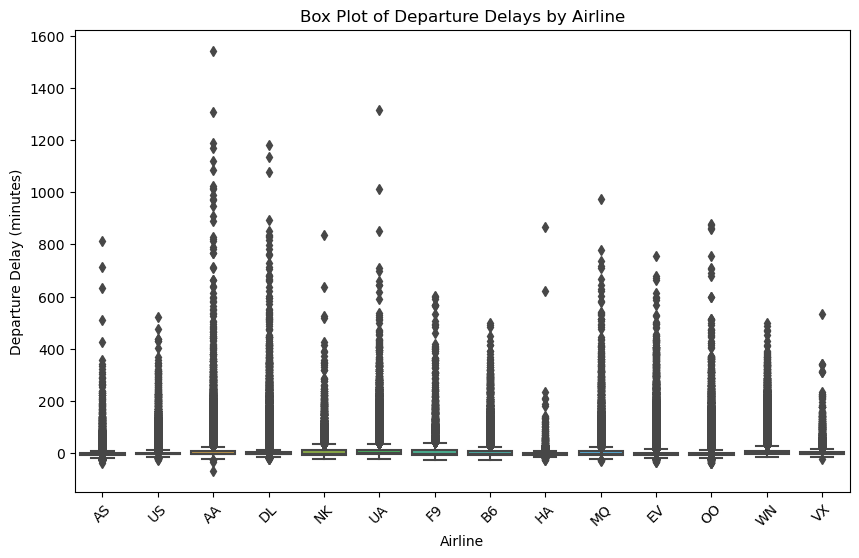

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each airline
for airline in delay_per_airline_stats.index:
    # Filter data for the current airline
    data = df_april[df_april['AIRLINE'] == airline]
    
    sns.boxplot(x = "DEPARTURE_DELAY",data = data)
    plt.title('Box Plot of Departure Delays by Airline')
    plt.xlabel('Airline')
    plt.ylabel('Departure Delay (minutes)')
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.show()
    
    # Show the plot
    plt.show()
# Créer un box plot avec Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_april['AIRLINE'], y=df_april['DEPARTURE_DELAY'])
plt.title('Box Plot of Departure Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Departure Delay (minutes)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

C:\Users\Melissa\AppData\Local\Temp\ipykernel_125340\3061442361.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
C:\Users\Melissa\anaconda3\envs\Sorbonne\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Melissa\anaconda3\envs\Sorbonne\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


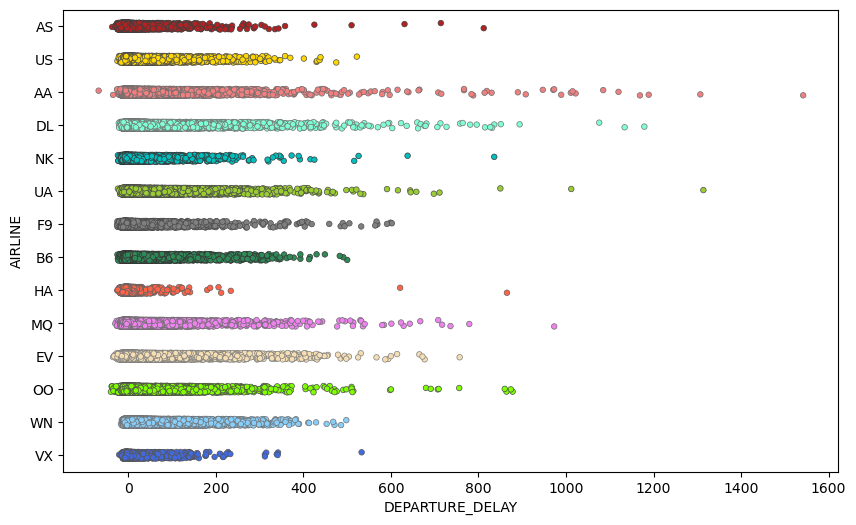

In [36]:
# I redefine the colors for correspondance with the pie charts
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
plt.figure(figsize=(10, 6))
sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=df_april, linewidth = 0.5,  jitter=True)
plt.show()

La plupart des retards de départ pour toutes les compagnies aériennes sont compris entre environ -7 minutes et 20 minutes. Cependant, pour certaines compagnies, ces retards peuvent aller jusqu'à environ 50 minutes. Au-delà de ces durées habituelles, il existe des durées bien plus élevées, mais ces valeurs sont considérées comme des données aberrantes, car elles surviennent rarement.

#### % de retard (moyennes) par compagnies

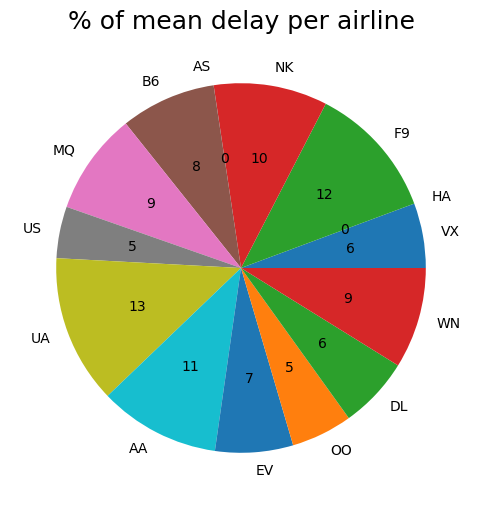

In [37]:
# Extract labels and sizes from delay_per_airline_stats DataFrame
labels = delay_per_airline_stats.index
sizes = delay_per_airline_stats['mean'].values
sizes  = [max(s,0) for s in sizes]

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct=lambda x: f"{x:.0f}", startangle=0)

# Set title and aspect ratio
plt.title('% of mean delay per airline', fontsize=18)

# Show the plot
plt.show()

#### % de vols par compagnies

In [38]:
print(delay_per_airline_stats.index)

Index(['VX', 'HA', 'F9', 'NK', 'AS', 'B6', 'MQ', 'US', 'UA', 'AA', 'EV', 'OO',
       'DL', 'WN'],
      dtype='object', name='AIRLINE')


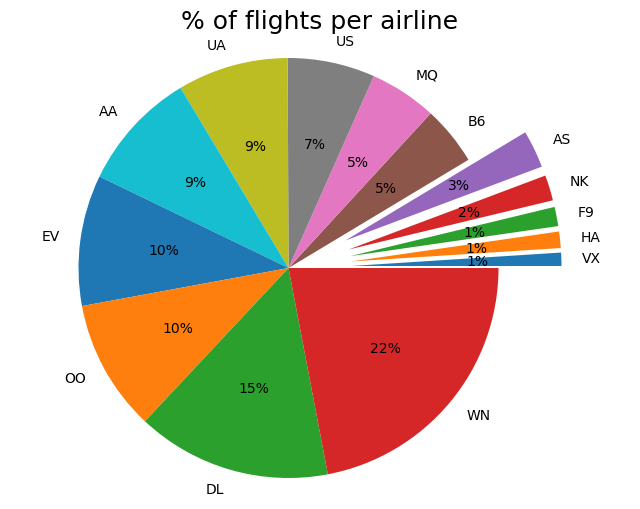

In [39]:
# Extract labels and sizes from delay_per_airline_stats DataFrame
labels = delay_per_airline_stats.index
sizes = delay_per_airline_stats['count'].values

# Set explode values based on sizes
explode = [0.3 if size < 20000 else 0.0 for size in sizes]

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', startangle=0)

# Set title and aspect ratio
plt.title('% of flights per airline', fontsize=18)
plt.axis('equal')

# Show the plot
plt.show()

La compagnie aérienne WN (Southwest Airlines Co.) est la compagnie aérienne qui effectue le plus de vol pourtant ce n'est pas celle qui commet la plus grande moyenne de retards
(elle est classée 5ème parmi toutes les compagnies).

Toutefois le premier camembert montre qu'il y a très peut de différences entre les compagnies aériennes pour les retards commis, à l'exception des compagnies Hawaiian Airlines et Alaska Airlines qui ont une moyenne proche de 0, le reste des compagnies ont une moyenne qui reste relativement faible entre 7 et 13 min.

#### Comparaison entre le retard effectuée au départ et à l'arrivée

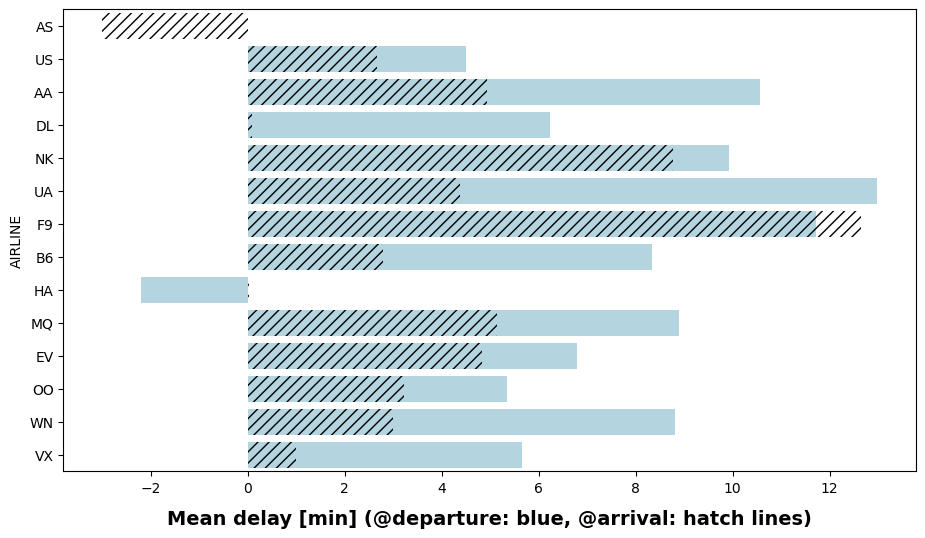

In [40]:
fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=df_april, color="lightblue", errorbar=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=df_april, hatch = '///',alpha = 0.0, errorbar=None)
plt.xlabel('Mean delay [min] (@departure: blue, @arrival: hatch lines)',fontsize=14, weight = 'bold', labelpad=10);

On remarque que pour la majorité des compagnies aériennes, le retard qu'elles ont effectuée au départ est rattrapée lors du vol. Elles ajustent la durée du vol afin qu'il n'y ait pas de conséquences sur l'heure d'arrivée, sauf pour les compagnies AS:Alaska Airlines Inc. et HA:Hawaiian Airlines Inc. qui respectivement arrivent en avance et décollent avant l'heure prévue

### Relation between distance and delays

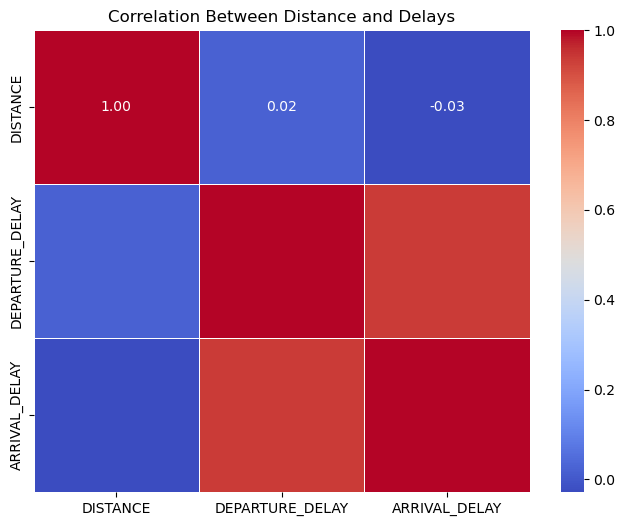

In [41]:
# Calcul de la matrice de corrélation
correlation_matrix = df_april[['DISTANCE', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']].corr()

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Distance and Delays')
plt.show()

La distance n'a pas d'incidence sur les retards, mais évidemment il y a une forte corrélation entre le retard au décollage et à l'arrivée, on a tout de même vu plus haut que le retard à l'arrivée était rattrapée par rapport au décollage

### Aéroports et Retards

In [42]:
airlines_names = pd.read_csv('data/data_usa/airlines.csv')
airports = pd.read_csv('data/data_usa/airports.csv')

In [43]:
abbr_companies = airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [44]:
identify_airport = airports.set_index('IATA_CODE')['CITY'].to_dict()

In [45]:
pd.set_option('display.max_rows', df_april.shape[0]+1)

#### Statistiques des aéroports

In [46]:
def get_stats(group):
    return {'count': group.count(),'min': group.min(), 'max': group.max(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
delay_per_airport_stats = df_april['DEPARTURE_DELAY'].groupby(df_april['ORIGIN_AIRPORT']).apply(get_stats).unstack()
delay_per_airport_stats = delay_per_airport_stats.sort_values('count')
styled_per_airport_stats = delay_per_airport_stats.style.highlight_max(color='lightgreen').highlight_min(color='lightcoral')
# Display the styled DataFrame
print(delay_per_airport_stats["mean"].mean())

5.1409345787142495


In [47]:
styled_per_airport_stats

,count,min,max,mean
ORIGIN_AIRPORT,,,,
ITH,6.000000,-7.000000,6.000000,-2.833333
MMH,7.000000,-15.000000,63.000000,17.428571
PPG,8.000000,-11.000000,32.000000,8.000000
ADK,9.000000,-15.000000,17.000000,4.000000
CEC,12.000000,-10.000000,18.000000,-1.333333
UST,13.000000,-14.000000,156.000000,8.000000
OTH,17.000000,-14.000000,76.000000,6.529412
HDN,21.000000,-20.000000,-1.000000,-8.857143
MTJ,22.000000,-13.000000,20.000000,-5.681818


Le retard moyen au décollage enregistré pour le mois d'avril entre tous les aéroports est d'environ 5 min ce qui est considéré comme un retard  acceptable. Le pire retard enregistré a été effectué par l'aéroport de San Diego avec 25,7 heures de retard mais en moyenne ce n'est pas l'aéroport qui fait le plus de retard (6.78 min). En moyenne c'est l'aéroport de Jack Brooks Regional qui est le plus en retard (31,78 min) mais on peut pas encore le classer comme étant le pire aéroport, ça dépend du nombre de vols qu'ils effectuent (si cet aéroport n'effectue pas beaucoup de vols c'est normal que sa moyenne soit élevée).

#### Statistique des aéroports en fonction des compagnies aériennes

##### Au départ

In [105]:
delay_per_airport_airline_stats = df_april['DEPARTURE_DELAY'].groupby([df_april['AIRLINE'], df_april['ORIGIN_AIRPORT']]).apply(get_stats).unstack()
delay_per_airport_airline_stats = delay_per_airport_airline_stats.sort_values(by='count').sort_index()

# Display the styled DataFrame
print(delay_per_airport_airline_stats["mean"].mean())

6.165219660181855


In [108]:
# Réorganiser les niveaux de l'index pour avoir les compagnies aériennes en premier niveau
delay_per_airport_airline_stats = delay_per_airport_airline_stats.swaplevel(1,0);

# Trier les index par compagnies aériennes
delay_per_airport_airline_stats = delay_per_airport_airline_stats.sort_index(level=0)

level_names = delay_per_airport_airline_stats.index.names

# Define a function to apply the styling for each airline
def highlight_best_worst_per_airline(s):
    max_val = s.groupby(level=level_names.index('AIRLINE')).max()
    min_val = s.groupby(level=level_names.index('AIRLINE')).min()
    return ['background-color: lightgreen' if v == max_val[a] else 'background-color: lightcoral' if v == min_val[a] else '' for a, v in zip(s.index.get_level_values(level_names.index('AIRLINE')), s)]

# Apply the styling function on each airline
styled_per_airport_airline_stats = delay_per_airport_airline_stats.style.apply(highlight_best_worst_per_airline, axis=0)

# Display the DataFrame with the style
styled_per_airport_airline_stats

En moyenne, les pires et meilleures délais on été effectué à partir des aéroports suivant pour chaque compagnie aériennes:

AA:

    - Meilleur: JAC avec environ 13,86 minutes d'avance au décollage
    - Pire: SDF avec environ 39,77 minutes de retard

AS:

    - Meilleur: LIH avec environ 8,04 minutes d'avance au décollage
    - Pire: TPA avec environ 11,46 minutes de retard


B6:

    - Meilleur: DTW avec environ 0,84 minutes d'avance au décollage
    - Pire: SJC avec environ 33,83 minutes de retard

DL:

    - Meilleur: ONT avec environ 6,5 minutes d'avance au décollage
    - Pire: PWM avec environ 25,20 minutes de retard

EV:

    - Meilleur: BIL avec environ 9,30 minutes d'avance au décollage
    - Pire: HOU avec environ 37,73 minutes de retard

F9:

    - Meilleur: BZN avec environ 9 minutes d'avance au décollage
    - Pire: BMI avec environ 35 minutes de retard

HA:

    - Meilleur: JFK avec environ 9,04 minutes d'avance au décollage
    - Pire: LAS avec environ 12,06 minutes de retard

MQ:

    - Meilleur: LAX avec environ 5,40 minutes d'avance au décollage
    - Pire: SAF avec environ 35,5 minutes de retard

NK:

    - Meilleur: PBI avec environ 0,9 minutes de retard au décollage
    - Pire: MSY avec environ 18 minutes de retard

OO:

    - Meilleur: GUC avec environ 14 minutes d'avance au décollage
    - Pire: CHO avec environ 25,76 minutes de retard

UA:

    - Meilleur: HDN avec environ 7,38 minutes d'avance au décollage
    - Pire: BQN avec environ 74,64 minutes de retard

US:

    - Meilleur: GEG avec environ 7,03 minutes d'avance au décollage
    - Pire: ORF avec environ 37 minutes de retard

VX:

    - Meilleur: DCA avec environ 2,58 minutes d'avance au décollage
    - Pire: MCO avec environ 23,73 minutes de retard

WN:

    - Meilleur: DSM avec environ 0,73 minutes d'avance au décollage
    - Pire: SDF avec environ 14,09 minutes de retard


A première vue, le meilleur aéroport en termes de temps de retard serait l'aéroport GUC et le pire serait l'aéroport BQN

##### Afficher les 10 pires aéroports et les 10 meilleurs

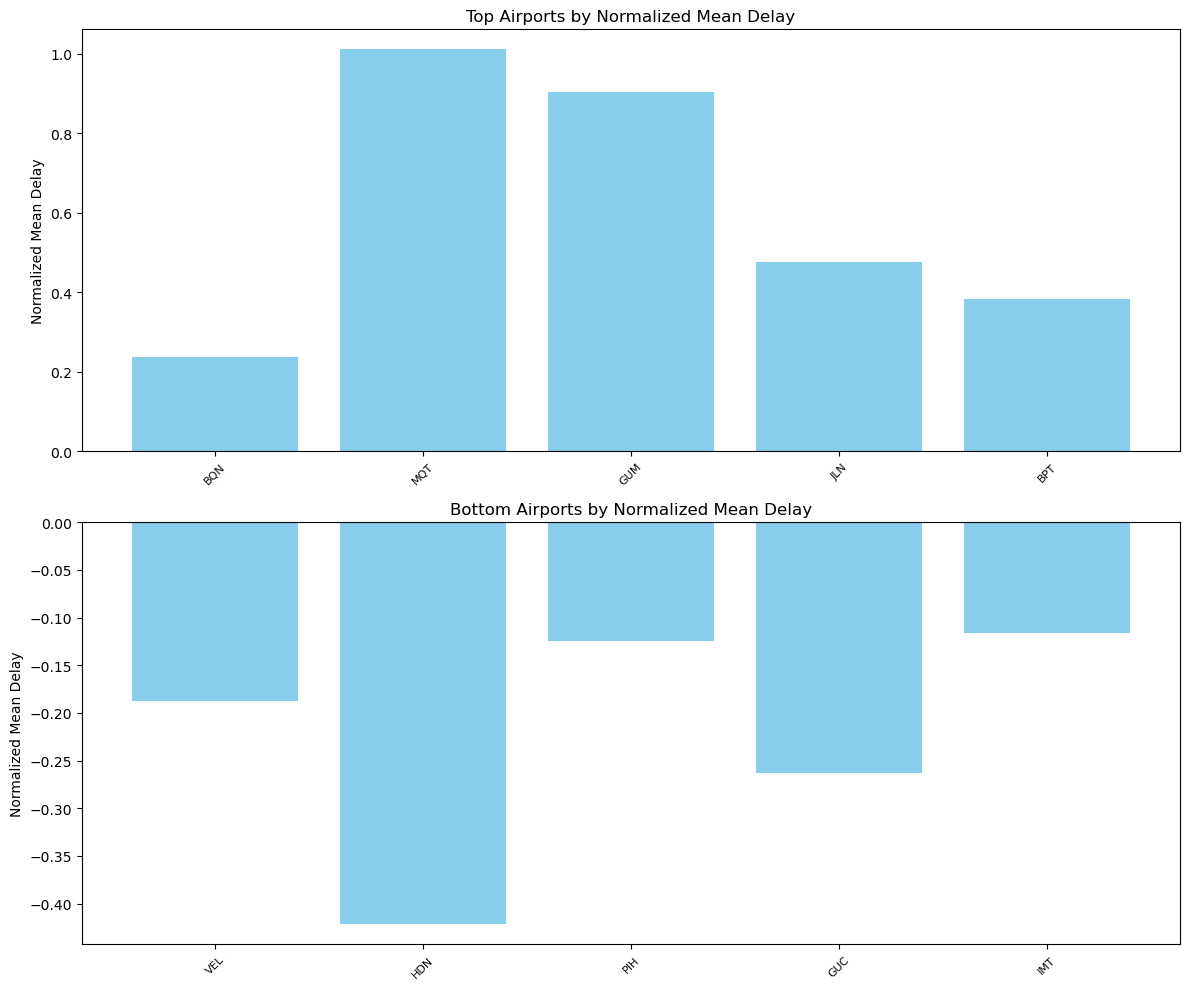

In [57]:
# Trier les aéroports par retard moyen
sorted_mean_delay = delay_per_airport_stats.sort_values(by='mean')
# Calculate normalized mean delay for each airport
normalized_mean_delay = sorted_mean_delay['mean'] / sorted_mean_delay['count']

# Set the number of airports to display on each end (e.g., top 10 and bottom 10)
top_n = 5
bottom_n = 5

# Select the top and bottom airports based on normalized mean delay
top_airports = normalized_mean_delay.tail(top_n)
bottom_airports = normalized_mean_delay.head(bottom_n)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot the normalized mean delays for top airports
axes[0].bar(top_airports.index, top_airports, color='skyblue')
axes[0].set_title('Top Airports by Normalized Mean Delay')
axes[0].set_ylabel('Normalized Mean Delay')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels for better visibility

# Plot the normalized mean delays for bottom airports
axes[1].bar(bottom_airports.index, bottom_airports, color='skyblue')
axes[1].set_title('Bottom Airports by Normalized Mean Delay')
axes[1].set_ylabel('Normalized Mean Delay')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

Après normalisation des valeurs (vu que le nombre de vols effectués par chaque comagnie aérienne à partir de ces aéroports n'est pas le même le résultat peut être biaisé) le graphe confirme en effet que GUC présente l'une des meilleurs performances après l'aéroport HDN (ne fait pas de retard en moyenne et est en avance) et BQN fait parti en effet des trois pires aéroports après les aéroports MQT et GUN.

##### A l'arrivée

In [111]:
arrival_per_airport_airline_stats = df_april['ARRIVAL_DELAY'].groupby([df_april['AIRLINE'], df_april['ORIGIN_AIRPORT']]).apply(get_stats).unstack()
arrival_per_airport_airline_stats = arrival_per_airport_airline_stats.sort_values(by='count').sort_index()

# Display the styled DataFrame
print(arrival_per_airport_airline_stats["mean"].mean())

3.2222126487216016


In [113]:
# Réorganiser les niveaux de l'index pour avoir les compagnies aériennes en premier niveau
arrival_per_airport_airline_stats = arrival_per_airport_airline_stats.swaplevel(1,0);

# Trier les index par compagnies aériennes
arrival_per_airport_airline_stats = arrival_per_airport_airline_stats.sort_index(level=0)

level_names_arrival = arrival_per_airport_airline_stats.index.names

# Define a function to apply the styling for each airline
def highlight_best_worst_per_airline_arrival(s):
    max_val = s.groupby(level=level_names_arrival.index('AIRLINE')).max()
    min_val = s.groupby(level=level_names_arrival.index('AIRLINE')).min()
    return ['background-color: lightgreen' if v == max_val[a] else 'background-color: lightcoral' if v == min_val[a] else '' for a, v in zip(s.index.get_level_values(level_names_arrival.index('AIRLINE')), s)]

# Apply the styling function on each airline
styled_per_airport_airline_stats_arrival = arrival_per_airport_airline_stats.style.apply(highlight_best_worst_per_airline_arrival, axis=0)

# Display the DataFrame with the style
styled_per_airport_airline_stats_arrival

En moyenne, les pires et meilleures délais on été effectué à partir des aéroports suivant pour chaque compagnie aériennes:

AA:

    - Meilleur: HDN avec environ 15,85 minutes d'avance à l'arrivée
    - Pire: SDF avec environ 47,08 minutes de retard

AS:

    - Meilleur: EWR avec environ 18,01 minutes d'avance à l'arrivée
    - Pire: JNU avec environ 9 minutes de retard


B6:

    - Meilleur: DTW avec environ 10,18 minutes d'avance à l'arrivée
    - Pire: SJC avec environ 32,65 minutes de retard

DL:

    - Meilleur: MHT avec environ 15,23 minutes d'avance à l'arrivée
    - Pire: ROA avec environ 20,53 minutes de retard

EV:

    - Meilleur: PHL avec environ 18,20 minutes d'avance à l'arrivée
    - Pire: HOU avec environ 32,33 minutes de retard

F9:

    - Meilleur: BZN avec environ 5,56 minutes d'avance à l'arrivée
    - Pire: SFO avec environ 31,16 minutes de retard

HA:

    - Meilleur: SEA avec environ 6,51 minutes d'avance à l'arrivée
    - Pire: LAS avec environ 20,91 minutes de retard

MQ:

    - Meilleur: LAX avec environ 9,60 minutes d'avance à l'arrivée
    - Pire: SAF avec environ 40,63 minutes de retard

NK:

    - Meilleur: SJU avec environ 4,77 minutes de retard à l'arrivée
    - Pire: MSY avec environ 22.95 minutes de retard

OO:

    - Meilleur: GUC avec environ 25,50 minutes de retard à l'arrivée
    - Pire: CHS avec environ 24,01 minutes de retard

UA:

    - Meilleur: HDN avec environ 21,75 minutes d'avance à l'arrivée
    - Pire: BQN avec environ 70,32 minutes de retard

US:

    - Meilleur: KOA avec environ 23,31 minutes d'avance à l'arrivée
    - Pire: ORF avec environ 51,25 minutes de retard

VX:

    - Meilleur: DCA avec environ 11,75 minutes d'avance à l'arrivée
    - Pire: MCO avec environ 18,13 minutes de retard

WN:

    - Meilleur: PWM avec environ 5,88 minutes d'avance à l'arrivée
    - Pire: LAX avec environ 7,69 minutes de retard


A première vue, le meilleur aéroport en termes de temps de retard serait l'aéroport GUC et le pire serait l'aéroport BQN toujours (ce qui est logique car BQN a un retard moyen d'environ 74 minutes au décollage donc il a du mal à rattraper ce retard à l'arrivée et GUC décolle en moyenne 14 minutes en avance).

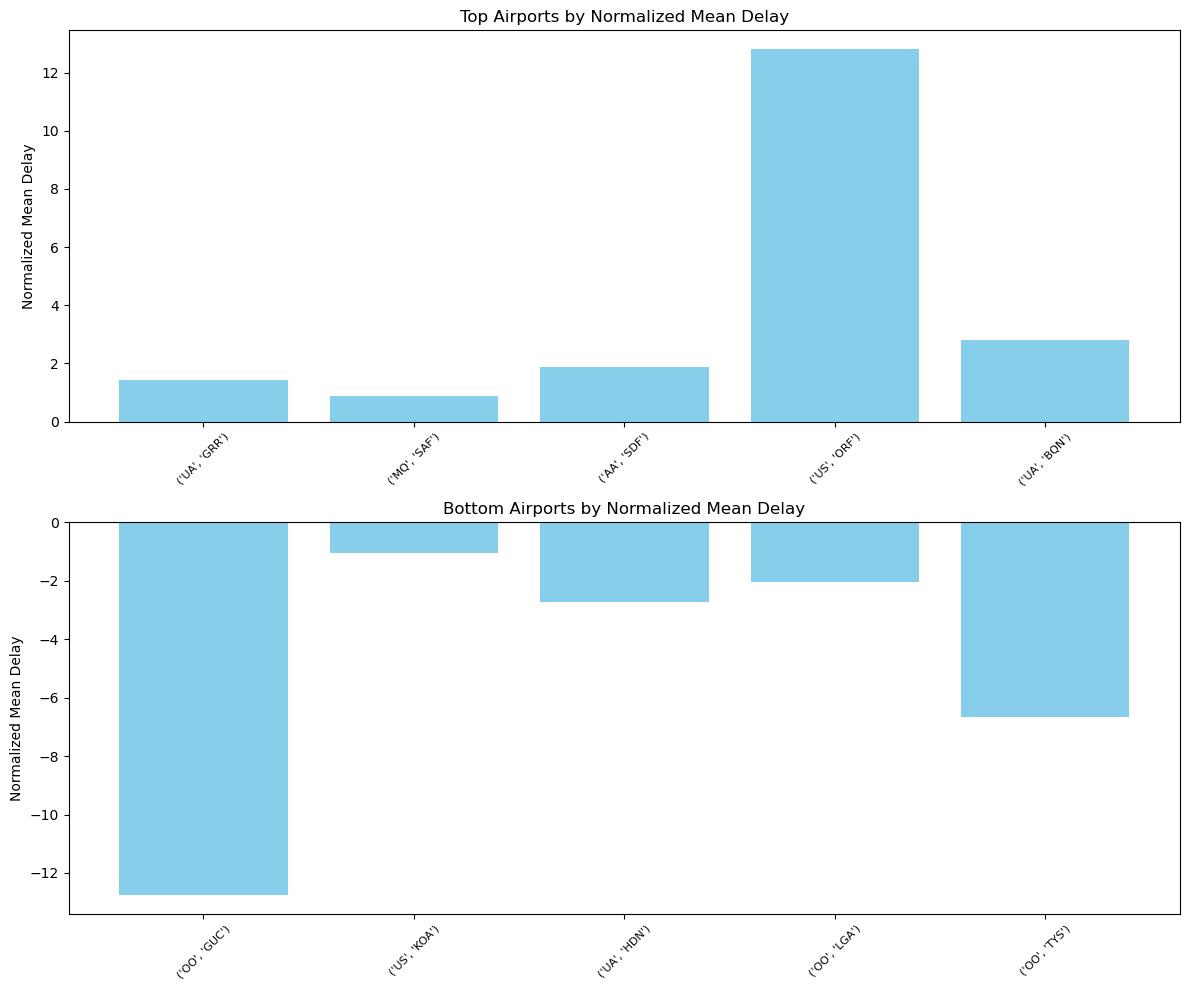

In [125]:
# Trier les aéroports par retard moyen
sorted_mean_arrival = arrival_per_airport_airline_stats.sort_values(by='mean')
# Calculate normalized mean delay for each airport
normalized_mean_arrival = sorted_mean_arrival['mean'] / sorted_mean_arrival['count']
# Set the number of airports to display on each end (e.g., top 10 and bottom 10)
top_n = 5
bottom_n = 5

# Select the top and bottom airports based on normalized mean delay
top_airports_arrival = normalized_mean_arrival.tail(top_n)
bottom_airports_arrival = normalized_mean_arrival.head(bottom_n)
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
top_airports_arrival.index = top_airports_arrival.index.map(str)
bottom_airports_arrival.index = bottom_airports_arrival.index.map(str)
# Plot the normalized mean delays for top airports
axes[0].bar(top_airports_arrival.index, top_airports_arrival, color='skyblue')
axes[0].set_title('Top Airports by Normalized Mean Delay')
axes[0].set_ylabel('Normalized Mean Delay')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels for better visibility

# Plot the normalized mean delays for bottom airports
axes[1].bar(bottom_airports_arrival.index, bottom_airports_arrival, color='skyblue')
axes[1].set_title('Bottom Airports by Normalized Mean Delay')
axes[1].set_ylabel('Normalized Mean Delay')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

Après la normalisation par contre, on remarque que BQN n'est plus le pire aéroport c'est ORF avec la compagnie aérienne US, et le meilleur reste GUC avec OO.

### Analyse des tendances temporelles

#### Preprocess du dataframe entier

In [127]:
df_flights.insert(loc = 0, column = 'DATE',value = pd.to_datetime(df_flights.loc[:, ['YEAR','MONTH', 'DAY']]))

In [129]:
df_flights.loc[:,'SCHEDULED_DEPARTURE']= format_col(df_flights, 'SCHEDULED_DEPARTURE')
df_flights.loc[:,'DEPARTURE_TIME'] = format_col(df_flights, 'DEPARTURE_TIME')
df_flights.loc[:,'SCHEDULED_ARRIVAL'] = format_col(df_flights, 'SCHEDULED_ARRIVAL')
df_flights.loc[:,'ARRIVAL_TIME'] = format_col(df_flights, 'ARRIVAL_TIME')

In [130]:
df_flights[["DATE","SCHEDULED_DEPARTURE","SCHEDULED_ARRIVAL","DEPARTURE_TIME","ARRIVAL_TIME"]]

,DATE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME
0,2015-01-01,00:05:00,04:30:00,23:54:00,04:08:00
1,2015-01-01,00:10:00,07:50:00,00:02:00,07:41:00
2,2015-01-01,00:20:00,08:06:00,00:18:00,08:11:00
3,2015-01-01,00:20:00,08:05:00,00:15:00,07:56:00
4,2015-01-01,00:25:00,03:20:00,00:24:00,02:59:00
...,...,...,...,...,...
5819074,2015-12-31,23:59:00,08:19:00,23:55:00,07:53:00
5819075,2015-12-31,23:59:00,04:46:00,23:55:00,04:30:00
5819076,2015-12-31,23:59:00,04:40:00,23:50:00,04:32:00
5819077,2015-12-31,23:59:00,03:40:00,23:53:00,03:30:00


In [131]:
#Drop non relevant columns
non_used_columns = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK','FLIGHT_NUMBER', 'TAIL_NUMBER','TAXI_OUT',
       'WHEELS_OFF','WHEELS_ON', 'TAXI_IN','AIR_TIME','DIVERTED', 'CANCELLED', 'CANCELLATION_REASON','AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df_flights = df_flights.drop(non_used_columns,axis=1)
df_flights

,DATE,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015-01-01,AS,ANC,SEA,00:05:00,23:54:00,-11.0,205.0,194.0,1448,04:30:00,04:08:00,-22.0
1,2015-01-01,AA,LAX,PBI,00:10:00,00:02:00,-8.0,280.0,279.0,2330,07:50:00,07:41:00,-9.0
2,2015-01-01,US,SFO,CLT,00:20:00,00:18:00,-2.0,286.0,293.0,2296,08:06:00,08:11:00,5.0
3,2015-01-01,AA,LAX,MIA,00:20:00,00:15:00,-5.0,285.0,281.0,2342,08:05:00,07:56:00,-9.0
4,2015-01-01,AS,SEA,ANC,00:25:00,00:24:00,-1.0,235.0,215.0,1448,03:20:00,02:59:00,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015-12-31,B6,LAX,BOS,23:59:00,23:55:00,-4.0,320.0,298.0,2611,08:19:00,07:53:00,-26.0
5819075,2015-12-31,B6,JFK,PSE,23:59:00,23:55:00,-4.0,227.0,215.0,1617,04:46:00,04:30:00,-16.0
5819076,2015-12-31,B6,JFK,SJU,23:59:00,23:50:00,-9.0,221.0,222.0,1598,04:40:00,04:32:00,-8.0
5819077,2015-12-31,B6,MCO,SJU,23:59:00,23:53:00,-6.0,161.0,157.0,1189,03:40:00,03:30:00,-10.0


In [132]:
df_flights.loc[:,'DISTANCE']= convert_distances(df_flights, 'DISTANCE')

In [133]:
#Missing values
missing_df = df_april.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Colonne', 'NaN Values']
missing_df['Filling factor (%)']=(df_april.shape[0]-missing_df['NaN Values'])/df_april.shape[0]*100
missing_df.sort_values('Filling factor (%)').reset_index(drop = True)

,Colonne,NaN Values,Filling factor (%)
0,ELAPSED_TIME,5900,98.783884
1,ARRIVAL_DELAY,5900,98.783884
2,ARRIVAL_TIME,4708,99.029580
3,DEPARTURE_TIME,4253,99.123366
4,DEPARTURE_DELAY,4253,99.123366
5,SCHEDULED_TIME,2,99.999588
6,DATE,0,100.000000
7,AIRLINE,0,100.000000
8,ORIGIN_AIRPORT,0,100.000000
9,DESTINATION_AIRPORT,0,100.000000


In [134]:
# Supprimer les valeurs NaN
df_flights.dropna(inplace = True)

In [135]:
df_flights.to_csv(f'./data/data_usa/flights_final.csv',index=False)

In [3]:
df_flights = pd.read_csv(f'./data/data_usa/flights_final.csv',low_memory=False)

#### Par jour de la semaine

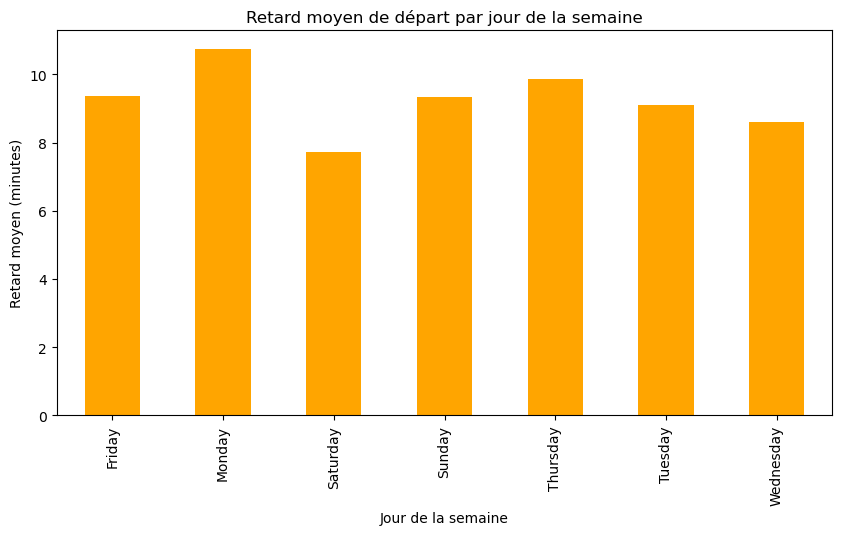

In [5]:
# Créer des colonnes pour le jour de la semaine et le mois
df_flights['DATE'] = pd.to_datetime(df_flights['DATE'])
df_flights['WEEKDAY'] = df_flights['DATE'].dt.day_name()

# Calculer la moyenne des retards par jour de la semaine
average_delay_weekday = df_flights.groupby('WEEKDAY')['DEPARTURE_DELAY'].mean()

# Visualisation
plt.figure(figsize=(10, 5))
average_delay_weekday.plot(kind='bar', color='orange')
plt.title('Retard moyen de départ par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Retard moyen (minutes)')
plt.show()

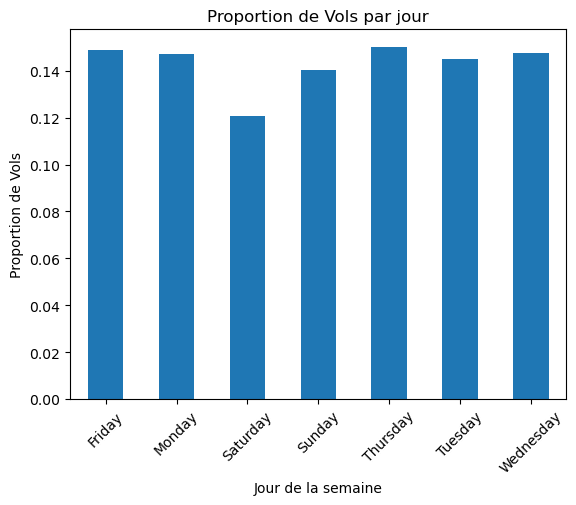

In [43]:
# Création d'un graphique à barres pour visualiser le nombre de vols par mois
flights_per_weekday = df_flights.groupby('WEEKDAY').size()
# Normaliser le nombre de vols par le total pour obtenir des proportions
total_flights = flights_per_weekday.sum()
normalized_flights_per_weekday = flights_per_weekday / total_flights

# Création d'un graphique à barres pour visualiser les proportions de vols par mois
normalized_flights_per_weekday.plot(kind='bar')
plt.title('Proportion de Vols par jour')
plt.xlabel('Jour de la semaine')
plt.ylabel('Proportion de Vols')
plt.xticks(ticks=range(len(normalized_flights_per_weekday)), labels=[str(weekday) for weekday in normalized_flights_per_weekday.index], rotation=45)
plt.show()

Les jours de la semaine où il y a le plus de retards sont les jours de la semaine où il y a le plus de vols (soit le lundi)

#### Par mois de l'année

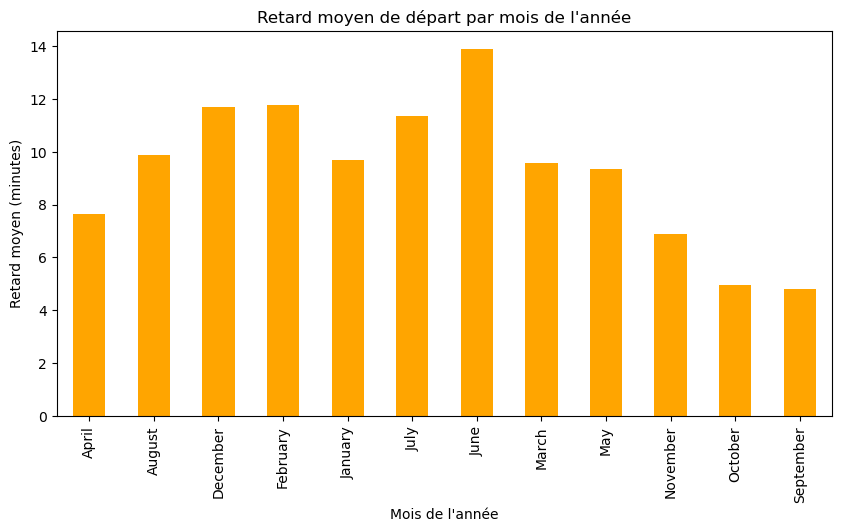

In [6]:
# Créer des colonnes pour le jour de la semaine et le mois
df_flights['MONTH'] = df_flights['DATE'].dt.month_name()

# Calculer la moyenne des retards par jour de la semaine
average_delay_month = df_flights.groupby('MONTH')['DEPARTURE_DELAY'].mean()

# Visualisation
plt.figure(figsize=(10, 5))
average_delay_month.plot(kind='bar', color='orange')
plt.title("Retard moyen de départ par mois de l'année")
plt.xlabel("Mois de l'année")
plt.ylabel('Retard moyen (minutes)')
plt.show()

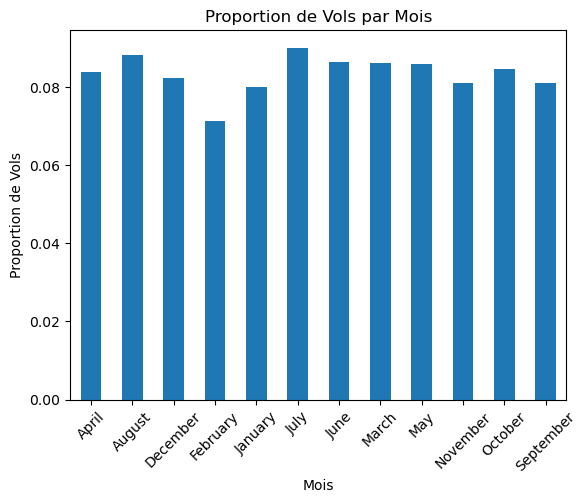

In [10]:
# Création d'un graphique à barres pour visualiser le nombre de vols par mois
flights_per_month = df_flights.groupby('MONTH').size()
# Normaliser le nombre de vols par le total pour obtenir des proportions
total_flights = flights_per_month.sum()
normalized_flights_per_month = flights_per_month / total_flights

# Création d'un graphique à barres pour visualiser les proportions de vols par mois
normalized_flights_per_month.plot(kind='bar')
plt.title('Proportion de Vols par Mois')
plt.xlabel('Mois')
plt.ylabel('Proportion de Vols')
plt.xticks(ticks=range(len(normalized_flights_per_month)), labels=[str(month) for month in normalized_flights_per_month.index], rotation=45)
plt.show()

#### Par saisons

In [11]:
def month_to_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'

# Appliquer la fonction à la colonne 'MONTH' pour créer une nouvelle colonne 'SEASON'
df_flights['SEASON'] = df_flights['MONTH'].apply(month_to_season)

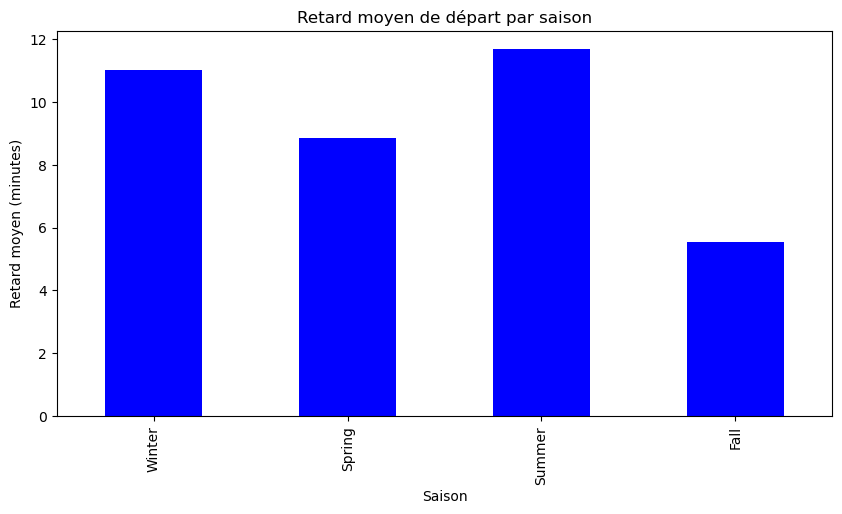

In [12]:
# Calculer la moyenne des retards par saison
average_delay_season = df_flights.groupby('SEASON')['DEPARTURE_DELAY'].mean()

# Visualisation des retards moyens par saison
plt.figure(figsize=(10, 5))
average_delay_season.reindex(['Winter', 'Spring', 'Summer', 'Fall']).plot(kind='bar', color='blue')
plt.title("Retard moyen de départ par saison")
plt.xlabel("Saison")
plt.ylabel('Retard moyen (minutes)')
plt.show()

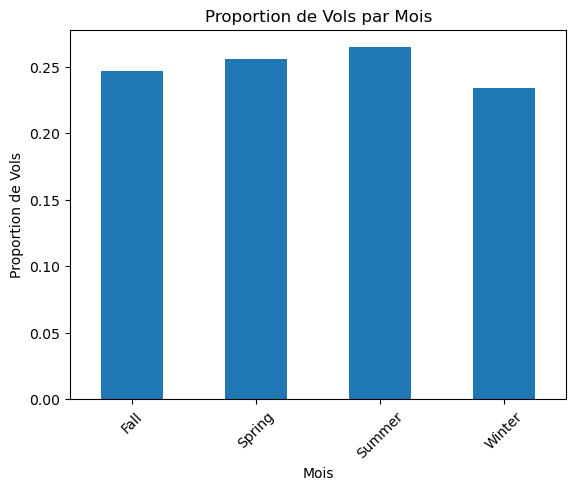

In [13]:
# Calculer le nombre de vols par saison
flights_per_season = df_flights.groupby('SEASON').size()
# Normaliser le nombre de vols par le total pour obtenir des proportions
total_flights_per_season = flights_per_season.sum()
normalized_flights_per_season = flights_per_season / total_flights_per_season

# Création d'un graphique à barres pour visualiser les proportions de vols par mois
normalized_flights_per_season.plot(kind='bar')
plt.title('Proportion de Vols par Mois')
plt.xlabel('Mois')
plt.ylabel('Proportion de Vols')
plt.xticks(ticks=range(len(normalized_flights_per_season)), labels=[str(season) for season in normalized_flights_per_season.index], rotation=45)
plt.show()

C'est durant l'été que le plus de retards sont enregistrés (surtout le mois de juin dans l'analyse par mois) ce qui pourrait être expliqué par le nombre de vols à cette période qui est plus élevée par rapport au nombre tout au long de l'année.

La deuxième saison qui enregistre le plus de retards est l'hiver (surtout le mois de février et décembre dans l'analyse par mois), toutefois ce n'est pas la saison où le plus de vols à été enregistré après l'été mais ça peut s'expliquer par les conditions météorologiques.

### Analyse de corrélation (jour/mois et retard)

In [56]:
df_flights['IS_DELAYED_DEPARTURE'] = df_flights['DEPARTURE_DELAY'].apply(lambda x: 1 if x > 0 else 0)  # 1 pour retardé, 0 sinon

# Création de variables indicatrices pour les jours de la semaine et le mois
correlation_data = pd.get_dummies(df_flights, columns=["MONTH", "WEEKDAY"])

# Ajouter la colonne de retard moyen par vol
correlation_data['AVERAGE_DELAY'] = df_flights['DEPARTURE_DELAY']
correlation_data = correlation_data.drop(["AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT","SCHEDULED_DEPARTURE","DEPARTURE_TIME","SCHEDULED_ARRIVAL","ARRIVAL_TIME"],axis =1)
# Calcul de la matrice de corrélation
correlation_matrix = correlation_data.corr()

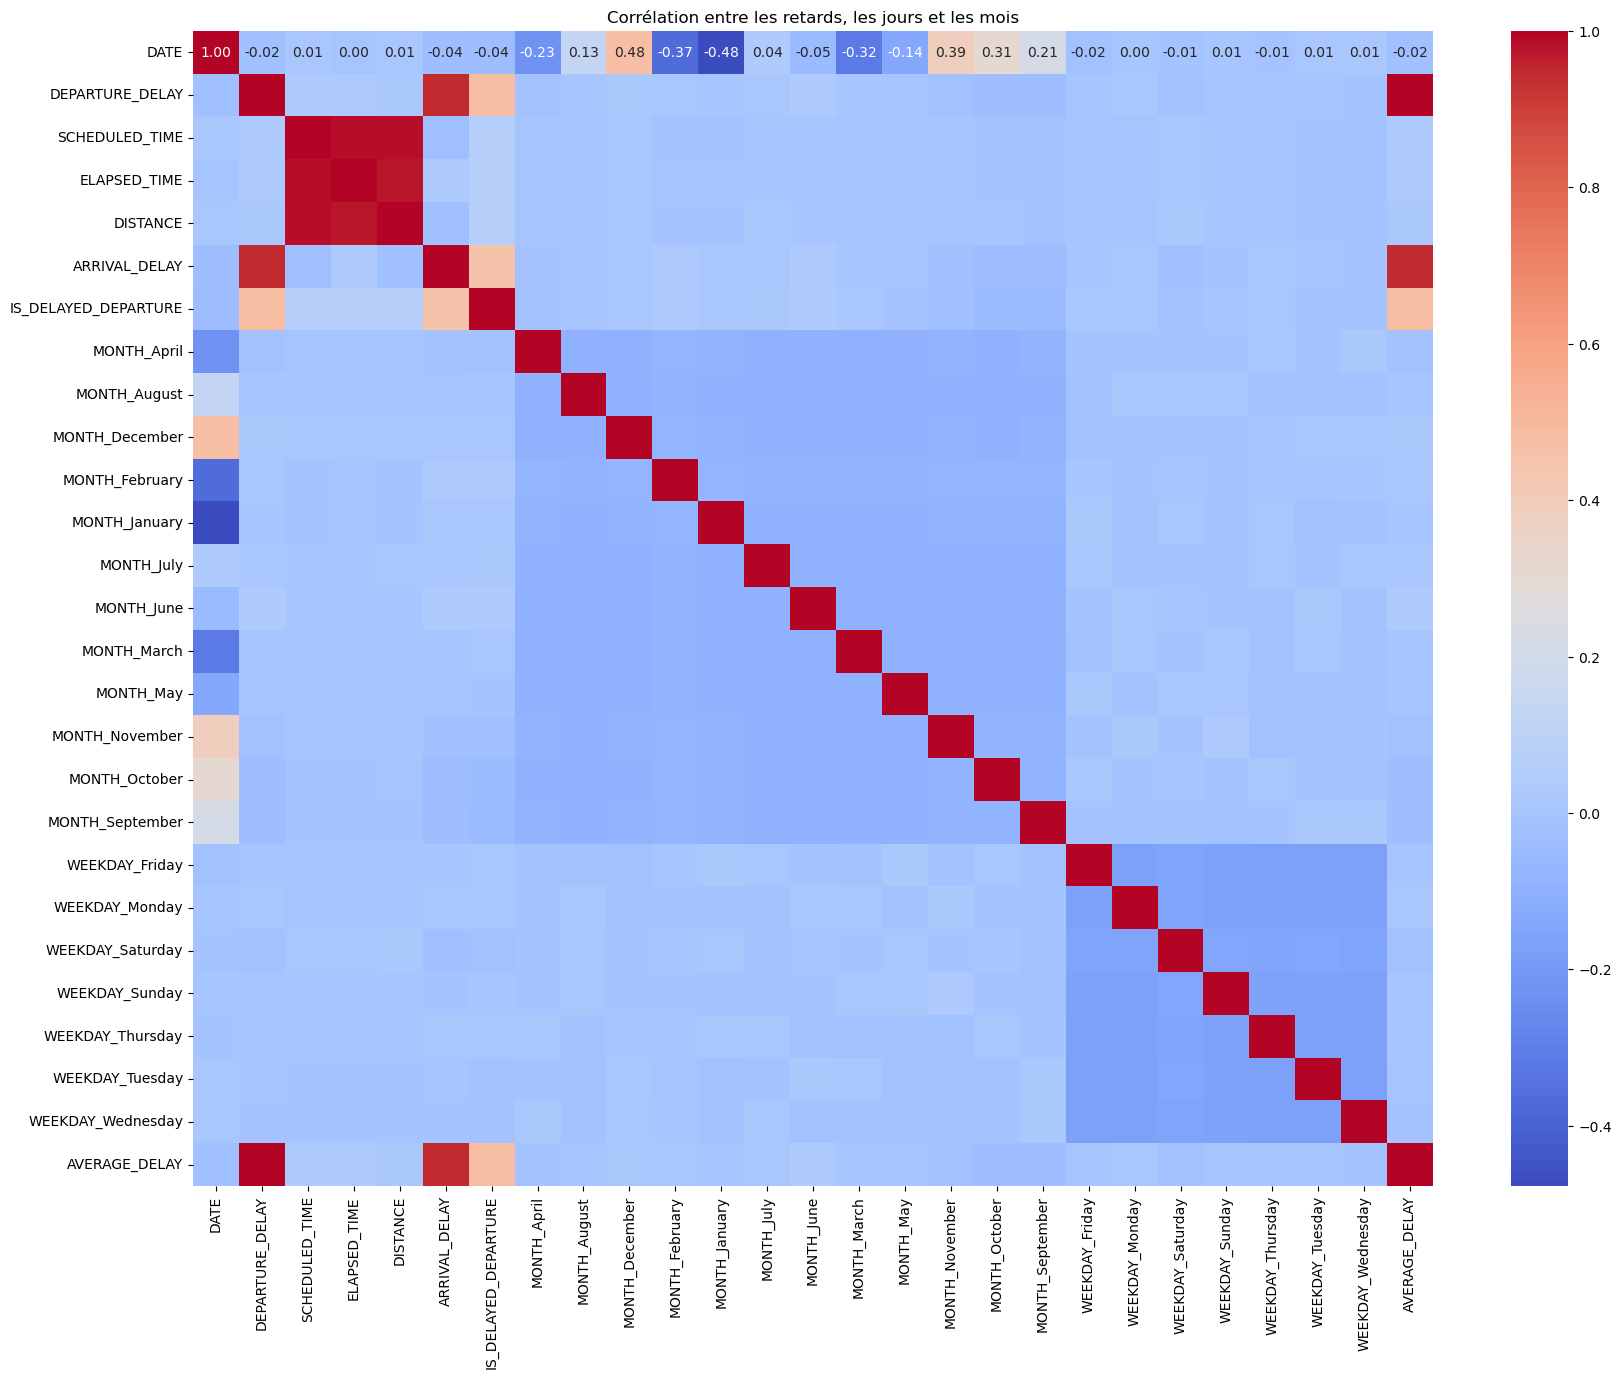

In [70]:
import numpy as np
columns_to_include = [col for col in correlation_matrix.columns if 'MONTH' in col or 'WEEKDAY' in col or col in correlation_matrix.columns]
correlation_focus = correlation_matrix[columns_to_include]

# Affichage de la matrice de corrélation
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_focus,annot = True, cmap='coolwarm', fmt=".2f",yticklabels=correlation_matrix.columns,annot_kws={"size": 10})
plt.title('Corrélation entre les retards, les jours et les mois')
plt.show()

Corrélations Fortes:

    - Les variables DEPARTURE_DELAY et ARRIVAL_DELAY présentent une forte corrélation (0.87), ce qui est attendu puisque les retards au départ peuvent souvent entraîner des retards à l'arrivée.

    - SCHEDULED_TIME et ELAPSED_TIME montrent également une corrélation élevée, indiquant que le temps de vol prévu est souvent proche du temps de vol réel.

Corrélations avec les mois et les jours de la semaine:

    - Les mois et les jours de la semaine montrent généralement une faible corrélation avec DEPARTURE_DELAY, à l'exception de certains mois spécifiques comme juin, décembre et février qui montrent une légère corrélation positive (jusqu'à 0.14).

    - Il y a peu de corrélation entre les jours de la semaine et DEPARTURE_DELAY, avec des valeurs allant de -0.01 à 0.03, ce qui implique que le jour de la semaine n'a pas d'influence significative sur les retards de départ (sauf pour le lundi)départ.

### Régression multiple

In [7]:
import statsmodels.api as sm

# Préparer les données pour la régression
X = pd.get_dummies(df_flights[['MONTH', 'WEEKDAY']], drop_first=True)  # Utiliser drop_first pour éviter la multicolinéarité
X = X.astype(int)
X['DISTANCE'] = df_flights['DISTANCE']
Y = df_flights['DEPARTURE_DELAY']

# Ajouter une constante à X
X = sm.add_constant(X)

# Construire le modèle de régression
model = sm.OLS(Y, X).fit()

# Afficher le résumé du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        DEPARTURE_DELAY   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2011.
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        04:06:34   Log-Likelihood:            -2.8706e+07
No. Observations:             5714008   AIC:                         5.741e+07
Df Residuals:                 5713989   BIC:                         5.741e+07
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.5669      0.06

Coefficients des variables:

    - const: Le coefficient constant est de 6.5669 avec un P>|t| de 0.000, signifiant qu'en l'absence de toutes les autres variables, le retard moyen est de 6.57 minutes (statistiquement significatif)

    - Mois: Les mois de février, juin et décembre montrent des coefficient positifs significatifs, indiquant des retards plus élevés pendant ces mois. Les mois de mai, septembre et octobre montrent des coefficients négatifs, suggérant moins de retard

    - Jour de la semaine: Aucun des jours de la semaine n'est significativement lié à une augmentation des retards, sauf le lundi qui a un petit effet positif

    - Distante: le coefficient pour la distance est de 0.0009 et est statistiquement significatif, indiquant que pour chaque unité supplémentaire de distance, le retard augmente en moyenne de 0.0009 minutes.9 minute.

In [9]:
import statsmodels.api as sm

# Préparer les données pour la régression
X = pd.get_dummies(df_flights[['MONTH', 'WEEKDAY']], drop_first=True)  # Utiliser drop_first pour éviter la multicolinéarité
X = X.astype(int)
X['DISTANCE'] = df_flights['DISTANCE']
Y = df_flights['ARRIVAL_DELAY']

# Ajouter une constante à X
X = sm.add_constant(X)

# Construire le modèle de régression
model = sm.OLS(Y, X).fit()

# Afficher le résumé du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2520.
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        04:10:43   Log-Likelihood:            -2.9058e+07
No. Observations:             5714008   AIC:                         5.812e+07
Df Residuals:                 5713989   BIC:                         5.812e+07
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.8322      0.07

Coefficients des variables:

    - const: Le retard moyen à l'arrivée est de 4.8322 minutes en l'absence d'autres factuerus (statistiquement significatif).
    
    - Mois: Les mois de février, juin montrent des coefficient positifs significatifs, indiquant des retards plus élevés pendant ces mois. Les mois de septembre et octobre montrent des coefficients négatifs, suggérant moins de retard

    - Jour de la semaine: Le lundi montre un effet positif significatif sur les retards, tandis que le dimanche et le samedi montrent des effets négatifs.

    - Distante: le coefficient est pratiquement nul (-0.0012) et statistiquement non significatif, indiquant que la distance parcourue n'influence pas significativement les retards à l'arrivée, (c'est vrai vu que les vols qui ont décollé en retard arrivent à rattraper légèrement le retard ensuite à l'arrivée quelque soit la distance).ivée.

### PCA

In [4]:
from sklearn.preprocessing import StandardScaler

# Supposons que df_flights est votre DataFrame et contient plusieurs variables numériques
# Sélectionnez les colonnes numériques pertinentes
columns = ["DEPARTURE_DELAY","SCHEDULED_TIME","ELAPSED_TIME","DISTANCE","ARRIVAL_DELAY"]
data = df_flights[columns]

# Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
data_pca = pca.fit(data_scaled)

In [30]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

summary_table = pd.concat([pd.DataFrame(explained_variance,columns = ["Explained variance"]),
                          pd.DataFrame(cumulative_explained_variance,columns = ["Cumulative explained variance"])],
                          axis = 1
                          )
summary_table

,Explained variance,Cumulative explained variance
0,5.926924e-01,0.592692
1,3.889651e-01,0.981657
2,1.444734e-02,0.996105
3,3.895210e-03,1.000000
4,9.941851e-12,1.000000


In [32]:
n_pcs = pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = data.columns.values.tolist()
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_item = pd.DataFrame(sorted(dic.items()))

In [33]:
df_item

,0,1
0,PC1,SCHEDULED_TIME
1,PC2,ARRIVAL_DELAY
2,PC3,DEPARTURE_DELAY
3,PC4,DISTANCE
4,PC5,SCHEDULED_TIME


In [28]:
n = data.shape[0] # nb of individuals
p = data.shape[1] # nb of variables
print(n, '  ', p)
eigval = (n-1) / n * pca.explained_variance_ # eigen values
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p)) # empty matrix for coordinates
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': data.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

5714008    5


,id,COR_1,COR_2
0,DEPARTURE_DELAY,0.045852,0.984882
1,SCHEDULED_TIME,0.995967,-0.028855
2,ELAPSED_TIME,0.992577,0.003179
3,DISTANCE,0.992030,-0.028379
4,ARRIVAL_DELAY,0.008694,0.986501


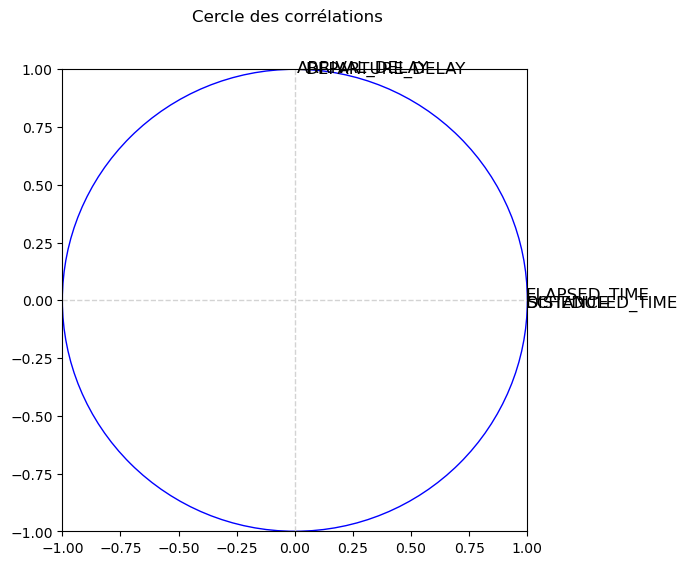

In [39]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j], coordvar["COR_2"][j], coordvar["id"][j], fontsize=12)

# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()